# **Data mining project - Banking**

- **Business description:**<br>
  Banks make money through the different services they provide. They are generally known as lenders, borrowing money from their own depositors and compensating them with an interest rate.
  The bank, then, lends the borrowed money to someone else charging them a higher value of interest, profitting over the difference between both interest rates.<br>

  This businness model is viable for the bank, as long as their clients keep covering their loan costs. As such, the bank needs to guarantee that they only borrow money to clients that can afford to pay back.<br><br>


- **Business objectives:**<br>
  Based on the explanation above, the objective of the bank is to minimize its losses by preventing loans to clients who cannot afford to pay the bank, keeping in mind that it is most costly for the bank to loan money to someone who cannot pay than to not grant a loan to a client who could.<br><br>

> In this case, the bank has access to account information like date of creation and address of the branch, client personal information like their birthday, sex or address, previous debits, transactions, credit card usage, granted and refused loans (through a status variable taking 1 or -1 as variable) as well as data organized by demographics.<br>
Using the diverse data collected from all the clients and their previous interactions, it is possible to develop a predictive model based on client patterns to decide which clients are statistically more likely to pay back or not. Thus, minimizing losses for the bank. <br>




# Setup

In [ ]:
# Displaying Hosted Runtime CPU
!cat /proc/cpuinfo  | grep -E 'cpu cores|model name|cpu MHz'

model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
cpu MHz		: 2199.998
cpu cores	: 1
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
cpu MHz		: 2199.998
cpu cores	: 1


In [ ]:
import sys

print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [ ]:
from google.colab import files
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import time
import datetime
import math
from sklearn import preprocessing, linear_model, tree, ensemble
from sklearn.decomposition import PCA
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.combine import SMOTEENN
from sklearn import metrics
from sklearn.tree import export_graphviz
! pip install kneed
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV

mpl.rcParams['agg.path.chunksize'] = 20000

pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

CURRENT_DATE = datetime.datetime(2021, 1, 1)

## Auxiliary functions

In [ ]:
#convert categorical columns to numerical values
def categoricalToNumerical(df, column_name):
    auxdf = df.copy()
    auxdf[column_name] = (preprocessing.LabelEncoder().fit(df[column_name].unique())).transform(auxdf[column_name])
    return auxdf


#convert multiple categorical columns to numerical values at once
def multipleCategoricalToNumerical(df, column_names):
  auxdf = df.copy()
  for column in column_names:
    auxdf = categoricalToNumerical(auxdf, column)
  return auxdf


#convert text column to float
def textToFloat(df, columns):
  auxdf = df.copy()
  for column in columns:
    auxdf[column] = auxdf[column].astype(float)
  return auxdf


#convert text column to int
def textToInt(df, columns):
  auxdf = df.copy()
  for column in columns:
    auxdf[column] = auxdf[column].astype(int)
  return auxdf


#remove (single or double) quotes from column
def removeQuotes(df):
  for j in df.columns:
    df[j] = df[j].replace({'"'},'', regex=True)
    df[j] = df[j].replace({'^\s'},"", regex=True)


#convert string value to float
def str2Float(value):
    return float(value.replace("'", ""))


# Creates a dictionary with { category: numeric representation }
def categoryMapCreator(df, columnName):
  counter = 0
  catMap = {}
  for cat in df[columnName].unique():
    catMap[cat] = counter
    counter = counter + 1
  return catMap


#Replaces NaN value in cell by the mean of the entire column
def substitueNaNByMean(df):
  return df.fillna(df.mean())


# Changes all categories in a column to it's respectic numeric value
def mapCategoryToNumeric(df, columnName, map):
  df[columnName] = df[columnName].apply(lambda x: map[x])


#returns first entry in df
def getFirstEntry(df):
  return df.iloc[0]


#returns last entry in df
def getLastEntry(df):
  return df.iloc[0]



Fetch and Format data

In [ ]:
baseURL = 'https://raw.githubusercontent.com/JoaoOliveiraRocha/AC/main/'

def fetchFile(filename):
  return pd.read_csv(baseURL+filename+'.csv',na_values=['NaN'])


def formatTable(listdf):
  for df in listdf:
    colname = df.columns[0]
    colnames = colname.split(';')
    for j in range(len(colnames)):
      colnames[j] = colnames[j].replace('"', "").strip()
    df[colnames] = df[colname].str.split(';', expand=True)
    df.drop(columns=df.columns[0], axis=1, inplace=True)
    df.reindex(sorted(df.columns), axis=1)

dfAccount = fetchFile('account')
dfClient = fetchFile('client')
dfDisp = fetchFile('disp')
dfDistrict = fetchFile('district')

dfLoanTrain = fetchFile('loan_train')
dfCardTrain = fetchFile('card_train')
dfTxTrain = fetchFile('trans_train')

dfCardTest = fetchFile('card_test')
dfLoanTest = fetchFile('loan_test')
dfTxTest = fetchFile('trans_test')

listdf = [dfAccount, dfClient, dfDisp, dfDistrict, dfLoanTrain, dfCardTrain, dfTxTrain]
listdfTest = [dfLoanTest, dfCardTest, dfTxTest]

formatTable(listdf)
formatTable(listdfTest)


Retreives files and associates each one with a panda Dataframe object.

Formats each table by splitting elements into columns, setting the name for each column, removing unnecessary quotes and updating the index.

# Data Visualization



##Observing the number of rows and columns for each Dataframe

[dfAccount, dfClient, dfDisp, dfDistrict, dfLoanTrain, dfCardTrain, dfTxTrain]

In [ ]:
nRows = ' Rows: '
nCols = 'Cols: '
for df in listdf:
  nRows += str(len(df))+ ' '
  nCols += str(len(df.columns)) + ' '

print(nRows,'\n',nCols)

 Rows: 4500 5369 5369 77 328 177 396685  
 Cols: 4 3 4 16 7 4 10 


#Data Cleaning and Manipulation

## Account Data

In [ ]:
dfAccount.head()

,account_id,district_id,frequency,date
0,576,55,"""monthly issuance""",930101
1,3818,74,"""monthly issuance""",930101
2,704,55,"""monthly issuance""",930101
3,2378,16,"""monthly issuance""",930101
4,2632,24,"""monthly issuance""",930102


###Transform the date format from YYMMDD to YYYY-MM-DD

In [ ]:
dfAccount['date'] = pd.to_datetime(dfAccount['date'], format = '%y%m%d', errors='coerce');

dfAccount.head()

,account_id,district_id,frequency,date
0,576,55,"""monthly issuance""",1993-01-01
1,3818,74,"""monthly issuance""",1993-01-01
2,704,55,"""monthly issuance""",1993-01-01
3,2378,16,"""monthly issuance""",1993-01-01
4,2632,24,"""monthly issuance""",1993-01-02


###Adding a column for the age

In [ ]:
dfAccount['age'] = dfAccount.apply(lambda row: (CURRENT_DATE - row['date']).days, axis=1)
dfAccount

,account_id,district_id,frequency,date,age
0,576,55,"""monthly issuance""",1993-01-01,10227
1,3818,74,"""monthly issuance""",1993-01-01,10227
2,704,55,"""monthly issuance""",1993-01-01,10227
3,2378,16,"""monthly issuance""",1993-01-01,10227
4,2632,24,"""monthly issuance""",1993-01-02,10226
...,...,...,...,...,...
4495,124,55,"""monthly issuance""",1997-12-28,8405
4496,3958,59,"""monthly issuance""",1997-12-28,8405
4497,777,30,"""monthly issuance""",1997-12-28,8405
4498,1573,63,"""monthly issuance""",1997-12-29,8404


## District Data

In [ ]:
dfDistrict.head()

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


###Replace the name and region string attributes with numeric values

In [ ]:

dfDistrict = multipleCategoricalToNumerical(dfDistrict, ['name', 'region'])


###Replace crime and unemployment undefined  values with the mean value of the columns.

This allows us to maintain the average unemployment and crime rates without the need to drop useful information of the same rows

In [ ]:
condition = dfDistrict['no. of commited crimes \'95'] != '?'
column = 'no. of commited crimes \'95'

meanCommitedCrimes95 = pd.to_numeric(dfDistrict[condition][column]).mean()


condition = dfDistrict['unemploymant rate \'95'] != '?'
column = 'unemploymant rate \'95'

meanUnemploymentRate95 = (dfDistrict[condition][column]).astype(float).mean()

print("Mean Commited Crimes 1995: " + str(meanCommitedCrimes95))
print("Mean Unemployment Rate 1995: " + str(meanUnemploymentRate95))



Mean Commited Crimes 1995: 4850.315789473684
Mean Unemployment Rate 1995: 3.1193421052631565


In [ ]:
column = 'no. of commited crimes \'95'

dfDistrict.loc[dfDistrict[column]=="?", column] = meanCommitedCrimes95

column = 'unemploymant rate \'95'

dfDistrict.loc[dfDistrict[column]=="?", column] = meanUnemploymentRate95


replaces the values for ('?') cells

###Adjustments to some numeric values








In [ ]:
dfDistrict = textToFloat(dfDistrict, ['unemploymant rate \'95','unemploymant rate \'96','ratio of urban inhabitants'])
dfDistrict = textToInt(dfDistrict, ['no. of commited crimes \'95','no. of commited crimes \'96','no. of enterpreneurs per 1000 inhabitants'])

dfDistrict['ratio of urban inhabitants'] = (dfDistrict['ratio of urban inhabitants'] / 100.0).round(2)

dfDistrict['no. of enterpreneurs per 1000 inhabitants'] = dfDistrict['no. of enterpreneurs per 1000 inhabitants'].apply(lambda x: x/1000.0)

dfDistrict.rename(columns={'no. of enterpreneurs per 1000 inhabitants':'ratio_entrepreneurs'}, inplace=True)


- *Converted "ratio of urban inhabitants" from percentage to 0-1 scale (with precision 2)*

- *Converted number of entrepreneurs per 1000 inhabitants into ratio*



 - *Converted following values to numeric values float or int:*
  - no. of commited crimes '95 (int)<br>
  - no. of commited crimes '96 (int)<br>
  - no. of enterpreneurs per 1000 inhabitants (int)<br>
  - ratio of urban inhabitants (float)<br>
  - unemploymant rate '95 (float)<br>
  - unemploymant rate '96 (float)<br>

###Format the columns to have more usable names

In [ ]:
dfDistrict.rename(columns={'no. of inhabitants': 'inhabitants', 'no. of municipalities with inhabitants < 499':'num_municipalities_<499', 'no. of municipalities with inhabitants 500-1999':'num_municipalities_500-1999', 'no. of municipalities with inhabitants 2000-9999 ':'num_municipalities_2000-9999', 'no. of municipalities with inhabitants >10000':'num_municipalities_>10000', 'no. of cities ':'num_cities', 'ratio of urban inhabitants':'ratio_urban_inhabitants', 'average salary':'avg_salary ', 'unemploymant rate \'95':'unemployment_rate_95','unemploymant rate \'96':'unemployment_rate_96', 'no. of enterpreneurs per 1000 inhabitants':'num_enterpreneurs_per_1000_inhabitants', 'no. of commited crimes \'95':'num_commited_crimes_95','no. of commited crimes \'96':'num_commited_crimes_96'}, inplace=True)
dfDistrict

,code,name,region,inhabitants,num_municipalities_<499,num_municipalities_500-1999,no. of municipalities with inhabitants 2000-9999,num_municipalities_>10000,no. of cities,ratio_urban_inhabitants,avg_salary,unemployment_rate_95,unemployment_rate_96,ratio_entrepreneurs,num_commited_crimes_95,num_commited_crimes_96
0,1,17,0,1204953,0,0,0,1,1,1.00,12541,0.29,0.43,0.167,85677,99107
1,2,0,1,88884,80,26,6,2,5,0.47,8507,1.67,1.85,0.132,2159,2674
2,3,1,1,75232,55,26,4,1,5,0.42,8980,1.95,2.21,0.111,2824,2813
3,4,27,1,149893,63,29,6,2,6,0.67,9753,4.64,5.05,0.109,5244,5892
4,5,29,1,95616,65,30,4,1,6,0.51,9307,3.85,4.43,0.118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,42,4,182027,17,49,12,2,7,0.56,8746,3.33,3.74,0.090,4355,4433
73,74,43,4,323870,0,0,0,1,1,1.00,10673,4.75,5.44,0.100,18782,18347
74,75,53,4,138032,67,30,4,2,5,0.65,8819,5.38,5.66,0.099,4063,4505
75,76,62,4,127369,31,32,13,2,7,0.51,8369,4.73,5.88,0.107,3736,2807


###Small observations for Crime and Unemployment increases

In [ ]:
crimes = [dfDistrict['num_commited_crimes_95'].sum(), dfDistrict['num_commited_crimes_96'].sum()]

unemployment = [dfDistrict['unemployment_rate_95'].mean(), dfDistrict['unemployment_rate_96'].mean()]

differenceCrime = crimes[1]-crimes[0]

differenceUnemployment = unemployment[1]-unemployment[0]

increasePercentageUnemployment = differenceUnemployment*100/unemployment[0]

increasePercentageCrime = differenceCrime*100/crimes[0]

print("Total crimes in 95: " + str(crimes[0]))
print("Total crimes in 96: " + str(crimes[1]))
print('\n')

print("Average unemployment rate in 95: " + str(round(unemployment[0],2)))
print("Average unemployment rate in 96: " + str(round(unemployment[1],2)))
print('\n')


print("Difference of more " + str(differenceCrime) + " crimes between 1996 and 1995, which represents an increase of " + str(increasePercentageCrime.round(2)) + "%")

print("Difference of more " + str(round(differenceUnemployment,2)) + " unemployment ratio between 1996 and 1995, which represents an increase of " + str(round(increasePercentageUnemployment,2)) + "%")



Total crimes in 95: 373474
Total crimes in 96: 387374


Average unemployment rate in 95: 3.12
Average unemployment rate in 96: 3.79


Difference of more 13900 crimes between 1996 and 1995, which represents an increase of 3.72%
Difference of more 0.67 unemployment ratio between 1996 and 1995, which represents an increase of 21.4%


In [ ]:
dfDistrict

,code,name,region,inhabitants,num_municipalities_<499,num_municipalities_500-1999,no. of municipalities with inhabitants 2000-9999,num_municipalities_>10000,no. of cities,ratio_urban_inhabitants,avg_salary,unemployment_rate_95,unemployment_rate_96,ratio_entrepreneurs,num_commited_crimes_95,num_commited_crimes_96
0,1,17,0,1204953,0,0,0,1,1,1.00,12541,0.29,0.43,0.167,85677,99107
1,2,0,1,88884,80,26,6,2,5,0.47,8507,1.67,1.85,0.132,2159,2674
2,3,1,1,75232,55,26,4,1,5,0.42,8980,1.95,2.21,0.111,2824,2813
3,4,27,1,149893,63,29,6,2,6,0.67,9753,4.64,5.05,0.109,5244,5892
4,5,29,1,95616,65,30,4,1,6,0.51,9307,3.85,4.43,0.118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,42,4,182027,17,49,12,2,7,0.56,8746,3.33,3.74,0.090,4355,4433
73,74,43,4,323870,0,0,0,1,1,1.00,10673,4.75,5.44,0.100,18782,18347
74,75,53,4,138032,67,30,4,2,5,0.65,8819,5.38,5.66,0.099,4063,4505
75,76,62,4,127369,31,32,13,2,7,0.51,8369,4.73,5.88,0.107,3736,2807


## Clients Data

In [ ]:
print('Rows: ' ,str(len(dfClient)))
print('Cols: ' ,str(len(dfClient)))


Rows:  5369
Cols:  5369


###Observations on client_id, district_id and birth_number

In [ ]:
dfClient.describe()

,client_id,birth_number,district_id
count,5369,5369,5369
unique,5369,5019,77
top,3449,"""475713""",1
freq,1,4,663


We can confirm all client_id's are unique. There is also only 77 unique values on district_id, that's aligned with the district data.

According to the data description: the birth_number columns represent 2 variables: the actual *birth_date* and the *sex* of the client.

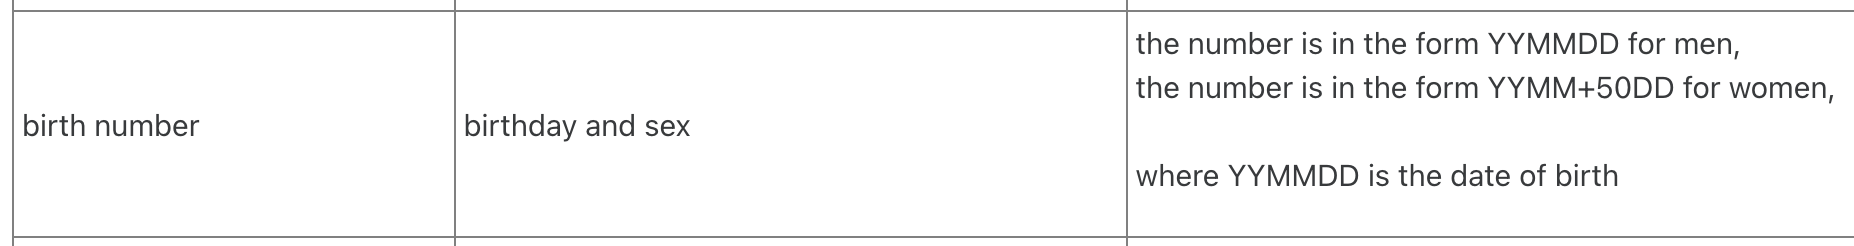

Although we need to covert the birth_number entry of the clients who are women into a date variable representing only the birtday, for the sake of data handling, we also think it might be relevant to have the information about the sex of the client, so we'll create a new column.

### Splitting birth_number into birthday and sex columns

In [ ]:
dfClient.head()

,client_id,birth_number,district_id
0,1,"""706213""",18
1,2,"""450204""",1
2,3,"""406009""",1
3,4,"""561201""",5
4,5,"""605703""",5


In [ ]:
def handleBirthday(bd):
    if ((round(int(bd)/1000) % 10) >= 5):
        return int(bd)-5000
    return int(bd)


dfClient["sex"] = dfClient.apply(lambda x: 0 if (round(int(x['birth_number'].replace('"',''))/1000) % 10) >= 5 else 1 , axis=1)
dfClient["birth_number"] = dfClient.apply(lambda x: handleBirthday(x['birth_number'].replace('"','')) , axis=1)

dfClient['birthday'] = pd.to_datetime('19'+dfClient['birth_number'].astype(str), format = '%Y%m%d', errors='coerce');

dfClient.drop('birth_number', axis=1, inplace=True)

print(dfClient.head())


  client_id district_id  sex   birthday
0         1          18    0 1970-12-13
1         2           1    1 1945-02-04
2         3           1    0 1940-10-09
3         4           5    1 1956-12-01
4         5           5    0 1960-07-03


birth_date has now become two columns: the client's birthday with a new date format as well as a new boolean column indicating if the client in question is male(0) or female(1)

###Observing male-female distribution

In [ ]:
sexDistr = dfClient.groupby(['sex'])['sex'].count().reset_index(name='count').sort_values(['count'], ascending=False)
sexDistr['%'] = sexDistr['count']/len(dfClient)
print(sexDistr)

   sex  count         %
1    1   2724  0.507357
0    0   2645  0.492643


The distribution between men and women seems to me balanced. 50.74% men and 49.26% women.

### Create Age parameter

In [ ]:
dfClient['age'] = dfClient.apply(lambda row: math.floor((CURRENT_DATE - row['birthday'])/ np.timedelta64(1, 'Y')), axis=1)

dfClient.drop('birthday', axis=1, inplace=True)

We create a new column with the age for each client

## Client dataset visualization



###Observing client distribution through districts

In [ ]:
districtDistribution = dfClient.groupby(['district_id'])['district_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(districtDistribution)

   district_id  count
0            1    663
71          74    180
67          70    169
49          54    155
60          64    109
..         ...    ...
61          65     44
3           12     44
53          58     44
12          20     43
16          24     43

[77 rows x 2 columns]


We can verify that the district 1 houses 663 clients. Comparing to the second and third most populated district: 74 and 70 with 180 and 169 clients respectively: it's not very balanced.

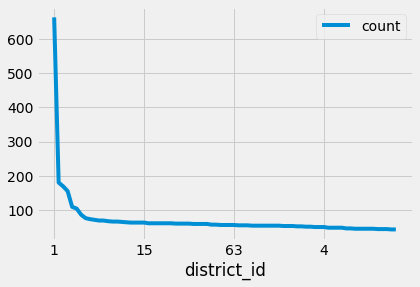

In [ ]:
districtDistribution.plot(x = 'district_id', y='count', kind='line')

From this quick visual representation, we can see that client-district relation is fairly balanced (except for the district 1).

We wonder if there's any relation between sex and district.

###Observing gender distribution through districts

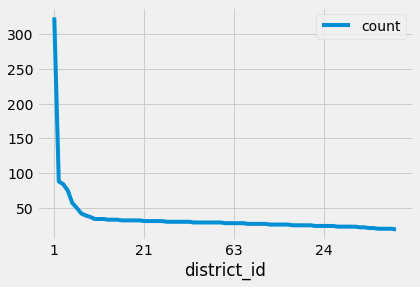

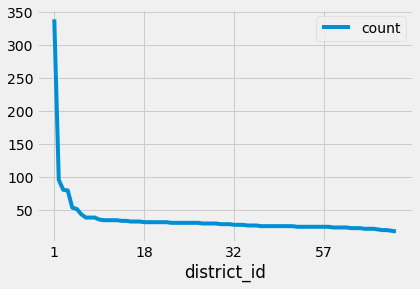

In [ ]:
districtDistributionMen = dfClient.where(dfClient['sex'] == 0).dropna(subset=['client_id']).groupby(['district_id'])['district_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)
districtDistributionWomen = dfClient.where(dfClient['sex'] == 1).dropna(subset=['client_id']).groupby(['district_id'])['district_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

districtDistributionMen.plot(x = 'district_id', y='count', kind='line')
districtDistributionWomen.plot(x = 'district_id', y='count', kind='line')

Both graphs are identical. The client distribution by districts doesn't seem to favor any of the genders.

## Disposition Data

###Observing potential missing values or duplicated in client_id column

In [ ]:
dfDisp.describe()

,disp_id,client_id,account_id,type
count,5369,5369,5369,5369
unique,5369,5369,4500,2
top,3449,3449,1845,"""OWNER"""
freq,1,1,2,4500


Immediately we can see that the client_id values are unique and match the client_id present on the Client Dataset. There should be no need to handle NaN or Missing values.

### Type attribute

###Creating owner column

In [ ]:
dfDisp['type'].unique()

array(['"OWNER"', '"DISPONENT"'], dtype=object)

The dataset has two different disposition types:
 - Owner
 - Disponent

In [ ]:
dfDisp["owner"] = dfDisp.apply(lambda x: True if x['type'].replace('"','') =='OWNER' else False, axis=1)
dfDisp.drop(['type'], axis=1, inplace=True);

dfDisp.head()

,disp_id,client_id,account_id,owner
0,1,1,1,True
1,2,2,2,True
2,3,3,2,False
3,4,4,3,True
4,5,5,3,False


We join them in a single owner boolean column

## Disposition dataset visualization



###Observing Owner-Disponent ratios in accounts.


In [ ]:
dispDistr = dfDisp.groupby(['owner'])['owner'].count().reset_index(name='count').sort_values(['count'], ascending=False)
dispDistr['%'] = dispDistr['count']/len(dfDisp)
print(dispDistr)



   owner  count         %
1   True   4500  0.838145
0  False    869  0.161855


We have 4500 owners. Which coincides with the amount of accounts present in the Account dataset, confirming that each account has always 1 owner.

Also only 16.2% of the accounts have a disponent. It's a smaller amount compared to account with just one owner.

In [ ]:
dfDisp2 = dfDisp

dfOwner = dfDisp2[dfDisp2.owner == True].groupby(['account_id'])['account_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)
dfDisponent = dfDisp2[dfDisp2.owner == False].groupby(['account_id'])['account_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

disponentEntries = dfDisponent ['account_id'].unique();
ownerEntries = dfOwner['account_id'].unique();

dfDispClient = pd.DataFrame()
dfDispClient['client_id'] = dfDisp['client_id']


print(len(disponentEntries))
print(len(ownerEntries))

def helperDisponentGrouper (row, lista):
  if (row['account_id'] in lista):
    return 1;
  else:
    return 0;


dfDispClient['n_disponent'] = dfDisp2.apply(lambda row: helperDisponentGrouper(row, disponentEntries), axis = 1)
dfDispClient['n_owner'] = dfDisp2.apply(lambda row: helperDisponentGrouper(row, ownerEntries), axis = 1)


869
4500


We can use the dfDisp and the dfDispClient for extra information about the accounts and the clients.

In [ ]:
print(dfDispClient.head())
print(dfDisp.head())


  client_id  n_disponent  n_owner
0         1            0        1
1         2            1        1
2         3            1        1
3         4            1        1
4         5            1        1
  disp_id client_id account_id  owner
0       1         1          1   True
1       2         2          2   True
2       3         3          2  False
3       4         4          3   True
4       5         5          3  False


## Card Data

This is one of the tables for which we have both the training and the test data. Most of the following operations regarding data analysis and treatment will be applied to both datasets since the attributes are the same.

We'll start by presenting the data from training and then from test.

In [ ]:
dfCardTrain

,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215
...,...,...,...,...
172,243,1478,classic,961213
173,162,967,junior,961223
174,594,3794,junior,961227
175,609,3893,classic,961229


In [ ]:
dfCardTest

,card_id,disp_id,type,issued
0,813,5873,"""junior""",961028
1,1014,9452,"""classic""",961102
2,408,2560,"""classic""",961210
3,1118,11393,"""classic""",970102
4,565,3601,"""gold""",970106
5,1173,12442,"""classic""",970508
6,847,6610,"""classic""",970520
7,1178,12542,"""classic""",970619
8,280,1793,"""classic""",970622
9,1138,11825,"""classic""",970629


### Date manipulation and type normalization

The first thing that's absolutely necessary to do is to convert both issued columns to a friendly data format.

In [ ]:
dfCardTrain['issued'] = pd.to_datetime(dfCardTrain['issued'], format = '%y%m%d', errors='coerce');

dfCardTrain.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,1993-11-07
1,104,588,classic,1994-01-19
2,747,4915,classic,1994-02-05
3,70,439,classic,1994-02-08
4,577,3687,classic,1994-02-15


YYYY-MM-DD format for date

In [ ]:
dfCardTest['issued'] = pd.to_datetime(dfCardTest['issued'], format = '%y%m%d', errors='coerce');

dfCardTest.head()

,card_id,disp_id,type,issued
0,813,5873,"""junior""",1996-10-28
1,1014,9452,"""classic""",1996-11-02
2,408,2560,"""classic""",1996-12-10
3,1118,11393,"""classic""",1997-01-02
4,565,3601,"""gold""",1997-01-06


Then, as we can see, the *type* column is different between the training and test datasets. While on the training dataset the *types* don't have double quotes, the latter are present in the test one. Let's normalize this.

In [ ]:
dfCardTest["type"] = dfCardTest["type"].astype(str).str.replace('"', "")

dfCardTest.head()

,card_id,disp_id,type,issued
0,813,5873,junior,1996-10-28
1,1014,9452,classic,1996-11-02
2,408,2560,classic,1996-12-10
3,1118,11393,classic,1997-01-02
4,565,3601,gold,1997-01-06


### Cards data analysis

Having the data in all columns in the correct format, let's proceed with the data analysis.

In [ ]:
dfCardTrain.describe(include = 'all')

,card_id,disp_id,type,issued
count,177,177,177,177
unique,177,177,3,162
top,661,2429,classic,1996-12-13 00:00:00
freq,1,1,127,2
first,NaN,NaN,NaN,1993-11-07 00:00:00
last,NaN,NaN,NaN,1996-12-31 00:00:00


In [ ]:
dfCardTest.describe(include = 'all')

,card_id,disp_id,type,issued
count,25,25,25,25
unique,25,25,3,25
top,436,12442,classic,1997-12-30 00:00:00
freq,1,1,20,1
first,NaN,NaN,NaN,1996-10-28 00:00:00
last,NaN,NaN,NaN,1998-10-13 00:00:00


Starting by analysing the number of rows, we easily conclude that the test dataset has just a few entries comparing with the training dataset. That was already expected, so there's no big deal here. Then, we can see that the Cards IDs are all different, as well as the Disposition IDs. We can also conclude, as we already expected, that both the training and test datasets have 3 possible values for the *type* attribute (junior, classic and gold).

Now, lets see the number of NaN values in the whole dataset.

In [ ]:
print('Number of NaN values in CardTrain: ' + str(dfCardTrain.isnull().sum().sum()))
print('Number of NaN values in CardTest: ' + str(dfCardTest.isnull().sum().sum()))

Number of NaN values in CardTrain: 0
Number of NaN values in CardTest: 0


There are no NaN values in the dataset.

Maximum date from Training Dataset: 1996-12-31 00:00:00
Minimum date from Testing Dataset: 1996-10-28 00:00:00


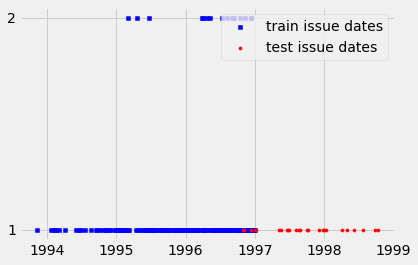

In [ ]:
print("Maximum date from Training Dataset: " + str(dfCardTrain['issued'].max()))
print("Minimum date from Testing Dataset: " + str(dfCardTest['issued'].min()))

dateNumberOccurenceTrain = dfCardTrain.groupby(['issued'])['issued'].count().reset_index(name='countTrain').sort_values(['countTrain'], ascending=False)
dateNumberOccurenceTest = dfCardTest.groupby(['issued'])['issued'].count().reset_index(name='countTest').sort_values(['countTest'], ascending=False)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dateNumberOccurenceTrain['issued'], dateNumberOccurenceTrain['countTrain'], s=10, c='b', marker="s", label='train issue dates')
ax1.scatter(dateNumberOccurenceTest['issued'], dateNumberOccurenceTest['countTest'], s=10, c='r', marker="o", label='test issue dates')

plt.yticks(range(1,3))
plt.legend(loc='upper right')
plt.show()

*Number of appearences of each date in the Training and Test datasets*

Last but not least, there's an interesting verification: the date intervals almost don't collide, with the training dates occuring before the test dates, as we can see in the above scatterplot.

Now, the following code snippet proceeds with the analysis of the number of cards per type. Let's see the results for both the training and test datasets.

      type  count
0  classic    127
2   junior     41
1     gold      9

Bars graph for the above table:


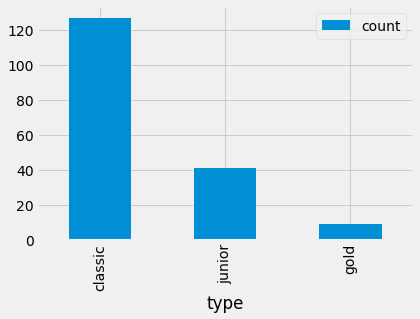

In [ ]:
cardtypedistribution = dfCardTrain.groupby(['type'])['type'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(cardtypedistribution)
print("\nBars graph for the above table:")
cardtypedistribution.plot.bar(y='count', x='type')

*Number of occurences of each Card type for the training dataset*

      type  count
0  classic     20
2   junior      4
1     gold      1

Bars graph for the above table:


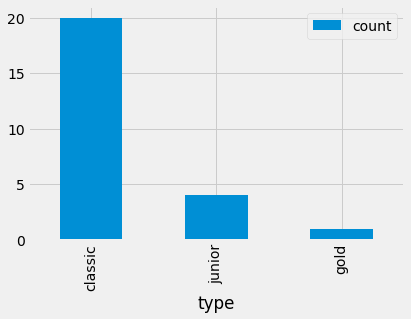

In [ ]:
cardtypedistribution = dfCardTest.groupby(['type'])['type'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(cardtypedistribution)
print("\nBars graph for the above table:")
cardtypedistribution.plot.bar(y='count', x='type')

*Number of occurences of each Card type for the test dataset*

In [ ]:
print("Percentage type distribution for training dataset: ")
print(dfCardTrain['type'].value_counts(normalize=True) * 100)
print("\nPercentage type distribution for test dataset: ")
print(dfCardTest['type'].value_counts(normalize=True) * 100)

Percentage type distribution for training dataset: 
classic    71.751412
junior     23.163842
gold        5.084746
Name: type, dtype: float64

Percentage type distribution for test dataset: 
classic    80.0
junior     16.0
gold        4.0
Name: type, dtype: float64


We can then conclude that the distribution of cards per type is very unbalanced, for both the training and test dataset, with similar distribution percentages, but if we look into the semantics, it makes sense that the junior and gold cards are less frequent than the classic cards.

## Loan Data

As we've already been doing in the previous datasets, let's start by seeing the characteristics of Loan Data.

For the following table, we have both the training and the test data. Most of the following operations regarding data analysis and treatment will be applied to both datasets since the attributes are the same.

In [ ]:
dfLoanTrain

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1
...,...,...,...,...,...,...,...
323,6818,9030,961212,155616,48,3242,1
324,5625,3189,961215,222180,60,3703,-1
325,6805,8972,961221,45024,48,938,1
326,7233,10963,961225,115812,36,3217,1


In [ ]:
dfLoanTest

,loan_id,account_id,date,amount,duration,payments,status
0,5895,4473,970103,93960,60,1566,
1,7122,10365,970104,260640,36,7240,
2,6173,5724,970108,232560,48,4845,
3,6142,5591,970121,221880,60,3698,
4,5358,2018,970121,38520,12,3210,
...,...,...,...,...,...,...,...
349,4989,105,981205,352704,48,7348,
350,5221,1284,981205,52512,12,4376,
351,6402,6922,981206,139488,24,5812,
352,5346,1928,981206,55632,24,2318,


This will probably be the most important dataset, since our main goal will be the prediction of the values in *status*.

### Date manipulation



In [ ]:
dfLoanTrain['date'] = pd.to_datetime(dfLoanTrain['date'], format = '%y%m%d', errors='coerce');

dfLoanTrain.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033,-1
1,5316,1801,1993-07-11,165960,36,4610,1
2,6863,9188,1993-07-28,127080,60,2118,1
3,5325,1843,1993-08-03,105804,36,2939,1
4,7240,11013,1993-09-06,274740,60,4579,1


In [ ]:
dfLoanTest['date'] = pd.to_datetime(dfLoanTest['date'], format = '%y%m%d', errors='coerce');

dfLoanTest.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5895,4473,1997-01-03,93960,60,1566,
1,7122,10365,1997-01-04,260640,36,7240,
2,6173,5724,1997-01-08,232560,48,4845,
3,6142,5591,1997-01-21,221880,60,3698,
4,5358,2018,1997-01-21,38520,12,3210,


YYYY-MM-DD format for the dates

### Loan data analysis

Let's start the analysis of the Loan data by a general description of the dataset (both the training and test).

In [ ]:
dfLoanTrain.describe(include = 'all')

,loan_id,account_id,date,amount,duration,payments,status
count,328,328,328,328,328,328,328
unique,328,328,283,316,5,300,2
top,6820,1993,1995-12-12 00:00:00,86184,24,3874,1
freq,1,1,3,2,75,3,282
first,NaN,NaN,1993-07-05 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,1996-12-27 00:00:00,NaN,NaN,NaN,NaN


In [ ]:
dfLoanTest.describe(include = 'all')

,loan_id,account_id,date,amount,duration,payments,status
count,354,354,354,354,354,354,354
unique,354,354,276,342,5,322,1
top,5719,8320,1998-04-19 00:00:00,84288,60,4537,
freq,1,1,4,2,80,3,354
first,NaN,NaN,1997-01-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,1998-12-08 00:00:00,NaN,NaN,NaN,NaN


The first thing we can observe, is that there aren't duplicate Loan IDs or Account IDs in neither dataset. Then, it becomes clear that both the dates, amount and payments are almost all different. However, the interesting part is the duration. There are only 5 unique durations for each dataset, which means that there are fixed values for loan durations:
- 12
- 24
- 36
- 48
- 60

Before seeing the distribution of loans per duration, let's make sure there are no NaN values in the whole dataset and that amounts, durations and payments are integer values.

In [ ]:
print('Number of NaN values in LoanTrain: ' + str(dfLoanTrain.isnull().sum().sum()))
print('Number of NaN values in LoanTest: ' + str(dfLoanTest.isnull().sum().sum()))

Number of NaN values in LoanTrain: 0
Number of NaN values in LoanTest: 0


In [ ]:
dfLoanTrain['duration'] = pd.to_numeric(dfLoanTrain['duration'], errors='coerce').astype('int')
dfLoanTest['duration'] = pd.to_numeric(dfLoanTest['duration'], errors='coerce').astype('int')

dfLoanTrain['amount'] = pd.to_numeric(dfLoanTrain['amount'], errors='coerce').astype('int')
dfLoanTest['amount'] = pd.to_numeric(dfLoanTest['amount'], errors='coerce').astype('int')

dfLoanTrain['payments'] = pd.to_numeric(dfLoanTrain['payments'], errors='coerce').astype('int')
dfLoanTest['payments'] = pd.to_numeric(dfLoanTest['payments'], errors='coerce').astype('int')

Now, let's proceed with the analysis of the distribution of loans per duration.

   duration  count
1        24     75
2        36     67
4        60     65
3        48     61
0        12     60

Bars graph for the above table:


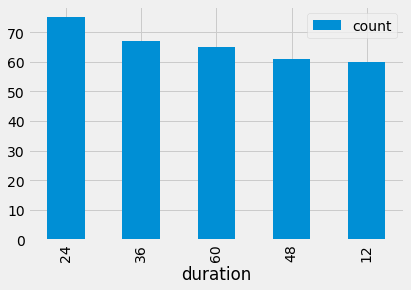

In [ ]:
loanperduration = dfLoanTrain.groupby(['duration'])['duration'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(loanperduration)
print("\nBars graph for the above table:")
loanperduration.plot.bar(y='count', x='duration')

*Number of loans in relation to their durations for the training dataset*

   duration  count
4        60     80
3        48     77
0        12     71
1        24     63
2        36     63

Bars graph for the above table:


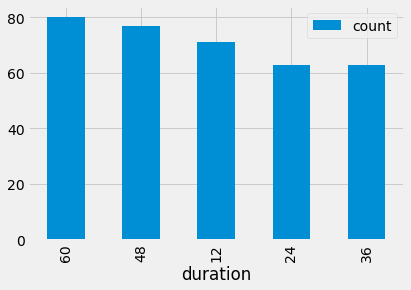

In [ ]:
loanperduration = dfLoanTest.groupby(['duration'])['duration'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(loanperduration)
print("\nBars graph for the above table:")
loanperduration.plot.bar(y='count', x='duration')

*Number of loans in relation to their durations for the test dataset*

In [ ]:
print("Percentage duration distribution for training dataset: ")
print(dfLoanTrain['duration'].value_counts(normalize=True) * 100)
print("\nPercentage duration distribution for test dataset: ")
print(dfLoanTest['duration'].value_counts(normalize=True) * 100)

Percentage duration distribution for training dataset: 
24    22.865854
36    20.426829
60    19.817073
48    18.597561
12    18.292683
Name: duration, dtype: float64

Percentage duration distribution for test dataset: 
60    22.598870
48    21.751412
12    20.056497
36    17.796610
24    17.796610
Name: duration, dtype: float64


With this results, we conclude that the distribution of loans among durations is quite balanced.

Now, let's see an interesting characteristic, shared by the previous analysis of the loan data.

Maximum date from Training Dataset: 1996-12-27 00:00:00
Minimum date from Testing Dataset: 1997-01-03 00:00:00


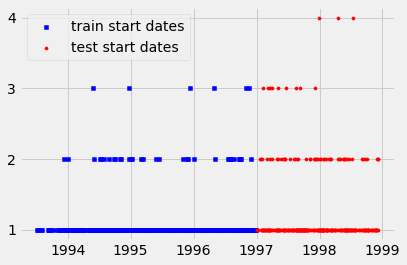

In [ ]:
print("Maximum date from Training Dataset: " + str(dfLoanTrain['date'].max()))
print("Minimum date from Testing Dataset: " + str(dfLoanTest['date'].min()))

dateNumberOccurenceTrain = dfLoanTrain.groupby(['date'])['date'].count().reset_index(name='countTrain').sort_values(['countTrain'], ascending=False)
dateNumberOccurenceTest = dfLoanTest.groupby(['date'])['date'].count().reset_index(name='countTest').sort_values(['countTest'], ascending=False)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dateNumberOccurenceTrain['date'], dateNumberOccurenceTrain['countTrain'], s=10, c='b', marker="s", label='train start dates')
ax1.scatter(dateNumberOccurenceTest['date'], dateNumberOccurenceTest['countTest'], s=10, c='r', marker="o", label='test start dates')

plt.yticks(range(1,5))
plt.legend(loc='upper left')
plt.show()

*Number of occurences of each starting date for loans on the Training and Test datasets*

In this case, it becomes clear that there's no touching point regarding the starting dates for the loans. All training dataset dates occur before the test dates.

Last but not least, let's analyse the distribution of the status attribute through the loans, but this time only for the training dataset, since we don't have that information for the test one (as we wish to predict it).

  status  count
1      1    282
0     -1     46

Bars graph for the above table:


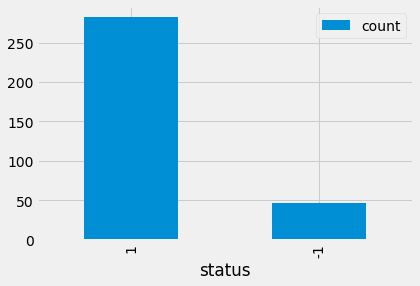

In [ ]:
loanperstatus = dfLoanTrain.groupby(['status'])['status'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(loanperstatus)
print("\nBars graph for the above table:")
loanperstatus.plot.bar(y='count', x='status')

*Number of paid (-1) and unpaid (1) loans for the Training dataset*

In [ ]:
print("Percentage status distribution for training dataset: ")
print(dfLoanTrain['status'].value_counts(normalize=True) * 100)

Percentage status distribution for training dataset: 
1     85.97561
-1    14.02439
Name: status, dtype: float64


As we can see, the distribution of the status through the loans is unbalanced, with a majority (over 85%) of known loans being successfully paid and a few ones being unsuccessful.

## Transaction Data

In [ ]:
(dfTxTrain)



,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,"""credit""","""credit in cash""",800.00,800.00,"""""",,
1,1548750,5270,930114,"""credit""","""collection from another bank""",44749.00,45549.00,"""""","""IJ""","""80269753"""
2,3393738,11265,930114,"""credit""","""credit in cash""",1000.00,1000.00,"""""",,
3,3122924,10364,930117,"""credit""","""credit in cash""",1100.00,1100.00,"""""",,
4,1121963,3834,930119,"""credit""","""credit in cash""",700.00,700.00,"""""",,
...,...,...,...,...,...,...,...,...,...,...
396680,515914,1763,961231,"""withdrawal""","""withdrawal in cash""",14.60,67769.50,"""payment for statement""",,
396681,516262,1765,961231,"""withdrawal""","""withdrawal in cash""",14.60,19708.10,"""payment for statement""",,
396682,520019,1775,961231,"""withdrawal""","""withdrawal in cash""",14.60,15944.50,"""payment for statement""",,
396683,517894,1769,961231,"""withdrawal""","""withdrawal in cash""",14.60,34679.40,"""payment for statement""",,


In [ ]:
(dfTxTest)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,6145,25,960728,credit,credit in cash,900.00,900.00,,,
1,6456,25,960827,credit,credit in cash,15800.00,16700.00,,,
2,6150,25,960903,credit,credit in cash,13067.00,29767.00,,,
3,6171,25,960905,credit,credit in cash,42054.00,71821.00,,,
4,6457,25,960906,withdrawal,withdrawal in cash,36000.00,77580.00,,,
...,...,...,...,...,...,...,...,...,...,...
30195,3412692,11328,980630,withdrawal in cash,withdrawal in cash,11831.00,28779.80,,,
30196,3412768,11328,980630,withdrawal,withdrawal in cash,14.60,28765.20,payment for statement,,
30197,3529532,11328,980630,credit,,188.70,40610.80,interest credited,,
30198,3412694,11328,980703,withdrawal in cash,withdrawal in cash,8383.00,20382.20,,,


In [ ]:
print('Trans Train rows: ' ,str(len(dfTxTrain)),', Cols: ' ,str(len(dfTxTrain.columns)))
print('Trans Test rows: ' ,str(len(dfTxTest)),', Cols: ' ,str(len(dfTxTest.columns)))

Trans Train rows:  396685 , Cols:  10
Trans Test rows:  30200 , Cols:  10


We can see immediately that the k_symbol, bank and account have some missing values (or just `""`). We'll address that first.

### Date manipulation

First, we'll remove the quotes and whitespace values (`" "` and `""`) from the test and training datasets.

In [ ]:
removeQuotes(dfTxTrain)
removeQuotes(dfTxTest)

dfTxTrain = textToFloat(dfTxTrain, ['amount', 'balance'])
dfTxTest = textToFloat(dfTxTest, ['amount', 'balance'])

In [ ]:
dfTxTrain['date'] = pd.to_datetime(dfTxTrain['date'], format = '%y%m%d', errors='coerce');
dfTxTest['date'] = pd.to_datetime(dfTxTest['date'], format = '%y%m%d', errors='coerce');

dfTxTrain.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,1993-01-13,credit,credit in cash,800.0,800.0,,,
1,1548750,5270,1993-01-14,credit,collection from another bank,44749.0,45549.0,,IJ,80269753
2,3393738,11265,1993-01-14,credit,credit in cash,1000.0,1000.0,,,
3,3122924,10364,1993-01-17,credit,credit in cash,1100.0,1100.0,,,
4,1121963,3834,1993-01-19,credit,credit in cash,700.0,700.0,,,


### Handle missing data

#### k_symbol

We'll add the `no_k_symbol` to the missing values first.

In [ ]:
dfTxTrain['k_symbol'] = dfTxTrain['k_symbol'].replace('', 'no_k_symbol' );
dfTxTest['k_symbol'] = dfTxTest['k_symbol'].replace('', 'no_k_symbol' );

print(dfTxTrain.groupby(['k_symbol'])['k_symbol'].count())
print('--------------')
print(dfTxTest.groupby(['k_symbol'])['k_symbol'].count())


k_symbol
household                                 42839
insurrance payment                         6592
interest credited                         70761
no_k_symbol                              204309
old-age pension                           13502
payment for statement                     58377
sanction interest if negative balance       305
Name: k_symbol, dtype: int64
--------------
k_symbol
household                                 2192
insurrance payment                         681
interest credited                         5130
no_k_symbol                              18968
payment for statement                     3186
sanction interest if negative balance       43
Name: k_symbol, dtype: int64


We'll display the distribution of the `k_symbol`.

(-1.1031425863226099,
 1.1001496469677434,
 -1.1038149192240272,
 1.1176146346598772)

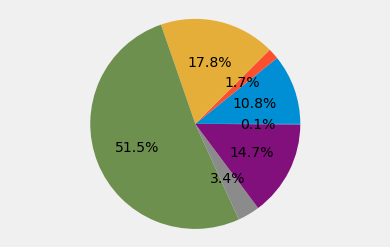

In [ ]:
fig3, axAccountKSymbol = plt.subplots()
axAccountKSymbol.pie([dfTxTrain.groupby(['k_symbol'])['k_symbol'].count()], autopct='%1.1f%%')
axAccountKSymbol.axis('equal')

*Distribution of k_symbol values*
 - Red: no_k_symbol
 - Green: interest credited
 - Brown: payment for statement
 - Blue: household
 - Purple: old-age pension
 - Orange: insurance payment
 - White: sanction interest if negative balance

For each account_id and each transfer with the same k_symbol we'll calculate the mean for the amounts involved.

For accounts with no transfers for a k_symbol we'll replace those values with the mean for the whole attribute in the dataset.

In [ ]:
kSymbolTxTrain = dfTxTrain.groupby(['account_id', 'k_symbol']).agg('mean').reset_index()

householdTxTrain = kSymbolTxTrain[kSymbolTxTrain ['k_symbol'] == 'household'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "household_mean"})
insurrancePaymentTxTrain = kSymbolTxTrain [kSymbolTxTrain ['k_symbol'] == 'insurrance payment'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "insurrance_payment_mean"})
interestCreditedTxTrain = kSymbolTxTrain [kSymbolTxTrain ['k_symbol'] == 'interest credited'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "interest_credited_mean"})
noKSymbolTxTrain = kSymbolTxTrain [kSymbolTxTrain ['k_symbol'] == 'no_k_symbol'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "no_k_symbol_mean"})
paymentForStatementTxTrain = kSymbolTxTrain [kSymbolTxTrain ['k_symbol'] == 'payment for statement'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "payment_for_statement_mean"})
sanctionInterestTxTrain =  kSymbolTxTrain [kSymbolTxTrain ['k_symbol'] == 'sanction interest if negative balance'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "sanction_interest_mean"})

kSymbolProcessed = pd.concat([householdTxTrain, insurrancePaymentTxTrain, interestCreditedTxTrain, noKSymbolTxTrain,
                      paymentForStatementTxTrain, sanctionInterestTxTrain])

kSymbolProcessed = kSymbolProcessed.groupby(['account_id']).sum()

ksymbolMeds = kSymbolProcessed.median()

kSymbolProcessed.replace(0.0, np.nan , inplace=True)
kSymbolProcessed = substitueNaNByMean(kSymbolProcessed)

print(kSymbolProcessed.head())



kSymbolTxTest = dfTxTrain.groupby(['account_id', 'k_symbol']).agg('mean').reset_index()

householdTxTest = kSymbolTxTest[kSymbolTxTest ['k_symbol'] == 'household'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "household_mean"})
insurrancePaymentTxTest = kSymbolTxTest [kSymbolTxTest ['k_symbol'] == 'insurrance payment'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "insurrance_payment_mean"})
interestCreditedTxTest = kSymbolTxTest [kSymbolTxTest ['k_symbol'] == 'interest credited'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "interest_credited_mean"})
noKSymbolTxTest = kSymbolTxTest [kSymbolTxTest ['k_symbol'] == 'no_k_symbol'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "no_k_symbol_mean"})
paymentForStatementTxTest = kSymbolTxTest [kSymbolTxTest ['k_symbol'] == 'payment for statement'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "payment_for_statement_mean"})
sanctionInterestTxTest =  kSymbolTxTest [kSymbolTxTest ['k_symbol'] == 'sanction interest if negative balance'].drop(['k_symbol', 'balance'], axis=1).rename(columns={"amount": "sanction_interest_mean"})

kSymbolProcessedTest = pd.concat([householdTxTest, insurrancePaymentTxTest, interestCreditedTxTest, noKSymbolTxTest,
                      paymentForStatementTxTest, sanctionInterestTxTest])

kSymbolProcessedTest = kSymbolProcessedTest.groupby(['account_id']).sum()

ksymbolTestMeds = kSymbolProcessedTest.median()

kSymbolProcessedTest.replace(0.0, np.nan , inplace=True)
kSymbolProcessedTest = substitueNaNByMean(kSymbolProcessed)


            household_mean  insurrance_payment_mean  interest_credited_mean  \
account_id                                                                    
1              2452.000000              1309.588816               74.814286   
10             4181.313649              1309.588816              105.250000   
100             598.000000              1309.588816              141.533333   
1000           3179.000000              2852.000000              193.719149   
10001          4181.313649              1309.588816              161.307692   

            no_k_symbol_mean  payment_for_statement_mean  \
account_id                                                 
1                2466.932203                   14.600000   
10              13354.111111                   17.076382   
100              6925.087591                   14.600000   
1000            14463.717172                   14.600000   
10001            9642.595745                   14.600000   

            sanction_inte

#### operation

In [ ]:
dfTxTrain['operation'].unique()

array(['credit in cash', 'collection from another bank', '',
       'withdrawal in cash', 'remittance to another bank',
       'credit card withdrawal'], dtype=object)

We have 5 different possible operations for the transaction:
- Credit in cash
- Collection from another bank
- withdrawal in cash
- remittance to another bank
- credit card withdrawal

In [ ]:
dfTxTrain['operation'] = dfTxTrain['operation'].replace('', 'no_operation' );
dfTxTest['operation'] = dfTxTest['operation'].replace('', 'no_operation' );

We replace empty operations with "no_operation"

Similarly to the k_symbol, we'll get, for each account_id, the mean of all the transfers with the same operation.

Any missing value will be replaced by the mean of the whole operation column.

In [ ]:
dfTxTrain.groupby(['operation'])['operation'].count()

operation
collection from another bank     26505
credit card withdrawal            1210
credit in cash                   62202
no_operation                     70761
remittance to another bank       70737
withdrawal in cash              165270
Name: operation, dtype: int64

(-1.1064810198601878,
 1.1003086199933423,
 -1.1248600609441506,
 1.1187176076439793)

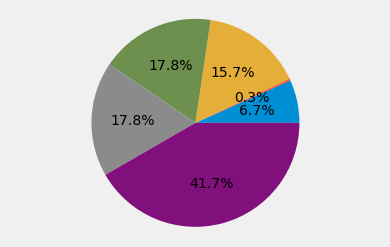

In [ ]:
fig3, axAccountKSymbol2 = plt.subplots()
axAccountKSymbol2.pie([dfTxTrain.groupby(['operation'])['operation'].count()], autopct='%1.1f%%')
axAccountKSymbol2.axis('equal')

In [ ]:
operationTxTrain = dfTxTrain.groupby(['account_id', 'operation']).agg('mean').reset_index()

creditCashTxTrain = operationTxTrain[operationTxTrain ['operation'] == 'credit in cash'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "credit_cash_mean"})
collectionTxTrain = operationTxTrain [operationTxTrain ['operation'] == 'collection from another bank'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "collection_mean"})
withdrawalTxTrain = operationTxTrain [operationTxTrain ['operation'] == 'withdrawal in cash'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "withdrawal_cash_mean"})
remittanceTxTrain = operationTxTrain [operationTxTrain ['operation'] == 'remittance to another bank'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "remitance_mean"})
creditCardWithdrawalTxTrain = operationTxTrain [operationTxTrain ['operation'] == 'credit card withdrawal'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "credit_card_withdrawal_mean"})
noOperationTxTrain =  operationTxTrain [operationTxTrain ['operation'] == 'no_operation'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "no_operation_mean"})

operationProcessed = pd.concat([creditCashTxTrain, collectionTxTrain, withdrawalTxTrain, remittanceTxTrain,
                      creditCardWithdrawalTxTrain, noOperationTxTrain])

operationProcessed = operationProcessed.groupby(['account_id']).sum()

operationProcessed.replace(0.0, np.nan, inplace=True)
operationProcessed = substitueNaNByMean(operationProcessed)

operationProcessed



operationTxTest = dfTxTest.groupby(['account_id', 'operation']).agg('mean').reset_index()

creditCashTxTest = operationTxTest[operationTxTest ['operation'] == 'credit in cash'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "credit_cash_mean"})
collectionTxTest = operationTxTest [operationTxTest ['operation'] == 'collection from another bank'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "collection_mean"})
withdrawalTxTest = operationTxTest [operationTxTest ['operation'] == 'withdrawal in cash'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "withdrawal_cash_mean"})
remittanceTxTest = operationTxTest [operationTxTest ['operation'] == 'remittance to another bank'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "remitance_mean"})
creditCardWithdrawalTxTest = operationTxTest [operationTxTest ['operation'] == 'credit card withdrawal'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "credit_card_withdrawal_mean"})
noOperationTxTest =  operationTxTest [operationTxTest ['operation'] == 'no_operation'].drop(['operation', 'balance'], axis=1).rename(columns={"amount": "no_operation_mean"})

operationProcessedTest = pd.concat([creditCashTxTest, collectionTxTest, withdrawalTxTest, remittanceTxTest,
                      creditCardWithdrawalTxTest, noOperationTxTest])

operationProcessedTest = operationProcessedTest.groupby(['account_id']).sum()


operationProcessedTest.replace(0.0, np.nan, inplace=True)

operationProcessedTest = substitueNaNByMean(operationProcessedTest)

####bank

In [ ]:
dfTxTrain.groupby(['bank'])['bank'].count()

bank
      299443
AB      7666
CD      7009
EF      7878
GH      7886
IJ      7536
KL      7397
MN      6626
OP      7595
QR      7413
ST      8114
UV      7618
WX      7033
YZ      7471
Name: bank, dtype: int64

In [ ]:
dfTxTrain['bank'] = dfTxTrain['bank'].replace('', 'no_bank' );
dfTxTest['bank'] = dfTxTest['bank'].replace('', 'no_bank' );

We don't think the specific bank a transfer go/comes will impact the loan status. We will drop this colum.

#### type

In [ ]:
print(dfTxTest.groupby(['type'])['type'].count().reset_index(name='count').sort_values(['count'], ascending=False).head())
print('--------------')
print(dfTxTrain.groupby(['type'])['type'].count().reset_index(name='count').sort_values(['count'], ascending=False).head())

                 type  count
1          withdrawal  17462
0              credit  11882
2  withdrawal in cash    856
--------------
                 type   count
1          withdrawal  232093
0              credit  159468
2  withdrawal in cash    5124


Not much to do here: it's just a classification for the type of transaction.

#### account

In [ ]:
print(dfTxTest.groupby(['account'])['account'].count().reset_index(name='count').sort_values(['count'], ascending=False))
print(dfTxTrain.groupby(['account'])['account'].count().reset_index(name='count').sort_values(['count'], ascending=False))

      account  count
0              21061
1           0   3316
407  79838293     30
242  52864879     28
216   4896235     28
..        ...    ...
418  81951832      1
527  98643308      1
447  85892647      1
185  41980844      1
186  42320823      1

[542 rows x 2 columns]
       account   count
0               294456
1            0    4987
3237  73166322      48
1695  42988401      48
2247  54522466      48
...        ...     ...
2870  65957486       1
1154  32765186       1
2258  54740381       1
62    11191487       1
763   24647236       1

[4537 rows x 2 columns]


In [ ]:
print('Trans Train rows: ' ,str(len(dfTxTrain)),', Cols: ' ,str(len(dfTxTrain.columns)))
print('Trans Test rows: ' ,str(len(dfTxTest)),', Cols: ' ,str(len(dfTxTest.columns)))

Trans Train rows:  396685 , Cols:  10
Trans Test rows:  30200 , Cols:  10


We can see that some transactions do not have an associated account or have the account 0 and that's not a valid account ID. We can't associate these entries to any other dataset so we'll remove them.

This is different from account_id.


In [ ]:
dfTxTrain['account'] = dfTxTrain['account'].replace('', 0 );
dfTxTrain['account'] = dfTxTrain['account'].replace('0', 0 );
dfTxTest['account'] = dfTxTest['account'].replace('', 0 );
dfTxTest['account'] = dfTxTest['account'].replace('0', 0 );

print(dfTxTest.groupby(['account'])['account'].count().reset_index(name='count').sort_values(['count'], ascending=False).head())
print(dfTxTrain.groupby(['account'])['account'].count().reset_index(name='count').sort_values(['count'], ascending=False).head())

      account  count
0           0  24377
406  79838293     30
241  52864879     28
215   4896235     28
10   11400890     24
       account   count
0            0  299443
326   15916598      48
1229  34144538      48
1421  37906074      48
1037  30300313      48


In [ ]:
dfTxTrainNoAcount = dfTxTrain[dfTxTrain.account == 0]
dfTxTrainAcount = dfTxTrain[dfTxTrain.account != 0]

print(dfTxTrainNoAcount.operation.unique())
print(dfTxTrainAcount.operation.unique())
print(dfTxTrain.operation.unique())


['credit in cash' 'no_operation' 'withdrawal in cash'
 'credit card withdrawal']
['collection from another bank' 'remittance to another bank']
['credit in cash' 'collection from another bank' 'no_operation'
 'withdrawal in cash' 'remittance to another bank'
 'credit card withdrawal']


In [ ]:
print(dfTxTrainNoAcount.bank.unique())
print(dfTxTrainAcount.bank.unique())
print(dfTxTrain.bank.unique())


['no_bank']
['IJ' 'QR' 'CD' 'KL' 'GH' 'ST' 'YZ' 'UV' 'MN' 'OP' 'AB' 'EF' 'WX']
['no_bank' 'IJ' 'QR' 'CD' 'KL' 'GH' 'ST' 'YZ' 'UV' 'MN' 'OP' 'AB' 'EF'
 'WX']


We can assume that transactions with account defined must be transaction to/from another bank or another account.

Transactions with account defined must have a bank attribute defined.

97242
299443


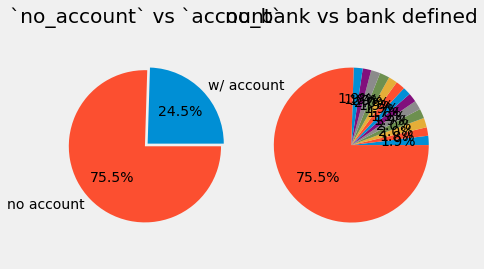

In [ ]:
fig, axs = plt.subplots(1, 2, tight_layout=False)

axs[0].pie([len(dfTxTrainAcount), len(dfTxTrainNoAcount)], explode=(0,0.05), autopct='%1.1f%%', labels=["w/ account", 'no account'])
axs[0].set_title('`no_account` vs `account`')
axs[0].axis('equal')

axs[1].pie([dfTxTrain.groupby(['bank'])['bank'].count()], autopct='%1.1f%%')
axs[1].set_title('no_bank vs bank defined')
axs[1].axis('equal')

print(len(dfTxTrainAcount))
print(len(dfTxTrainNoAcount))



Given that that amount represents 80.72% (for the test dataset) and 75.49% (for the training). We'll remove this attribute from the dataset.

In [ ]:
dfTxTrain.drop(['account'], axis=1)
dfTxTest.drop(['account'], axis=1)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank
0,6145,25,1996-07-28,credit,credit in cash,900.0,900.0,no_k_symbol,no_bank
1,6456,25,1996-08-27,credit,credit in cash,15800.0,16700.0,no_k_symbol,no_bank
2,6150,25,1996-09-03,credit,credit in cash,13067.0,29767.0,no_k_symbol,no_bank
3,6171,25,1996-09-05,credit,credit in cash,42054.0,71821.0,no_k_symbol,no_bank
4,6457,25,1996-09-06,withdrawal,withdrawal in cash,36000.0,77580.0,no_k_symbol,no_bank
...,...,...,...,...,...,...,...,...,...
30195,3412692,11328,1998-06-30,withdrawal in cash,withdrawal in cash,11831.0,28779.8,no_k_symbol,no_bank
30196,3412768,11328,1998-06-30,withdrawal,withdrawal in cash,14.6,28765.2,payment for statement,no_bank
30197,3529532,11328,1998-06-30,credit,no_operation,188.7,40610.8,interest credited,no_bank
30198,3412694,11328,1998-07-03,withdrawal in cash,withdrawal in cash,8383.0,20382.2,no_k_symbol,no_bank


### Data visualization

We'll visualize if there's any tendency between the amount and balance attributes.

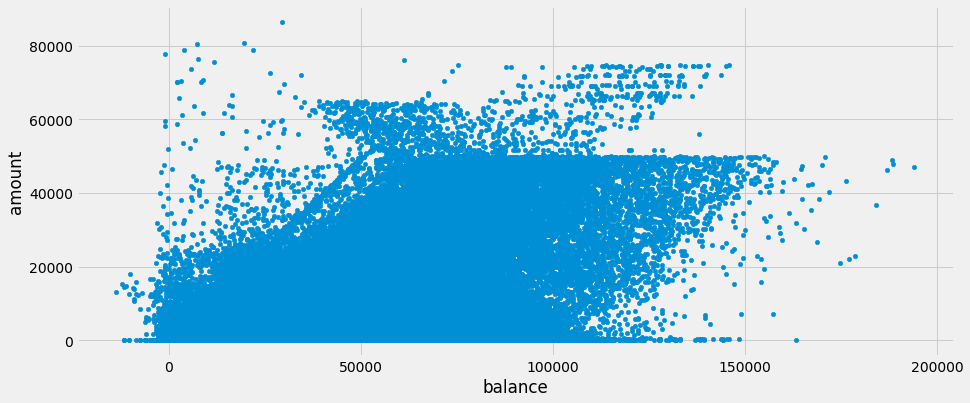

In [ ]:
ax3 = dfTxTrain.plot.scatter(x='balance', y='amount', figsize=(14,6))

We'll filter for only transfers with account defined:

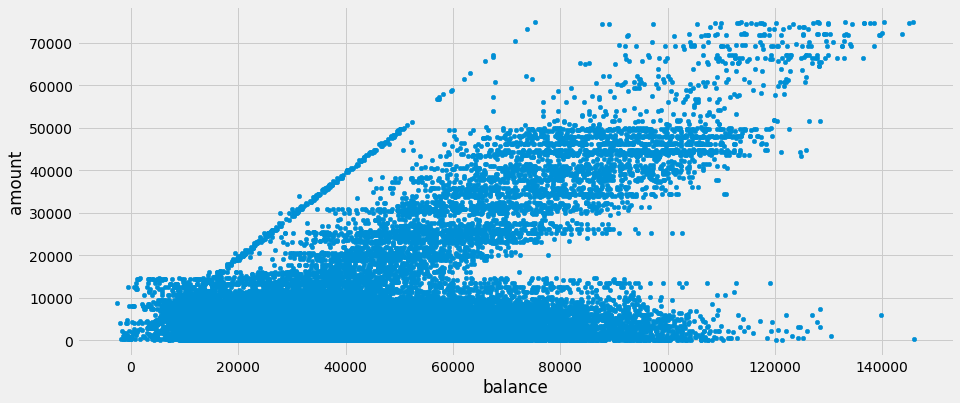

In [ ]:
dfTxTrainAcount = textToFloat(dfTxTrainAcount, ['amount', 'balance'])
ax4 = dfTxTrainAcount.plot.scatter(x='balance', y='amount', figsize=(14,6))

Here we can see that there's a relation between amount and balance.
The majority of the transfers happen when balance > amount. The transfers where the amount is larger than the balance might represent transfers that make an account's balance go negative or simply receiving money on a negative balance account.



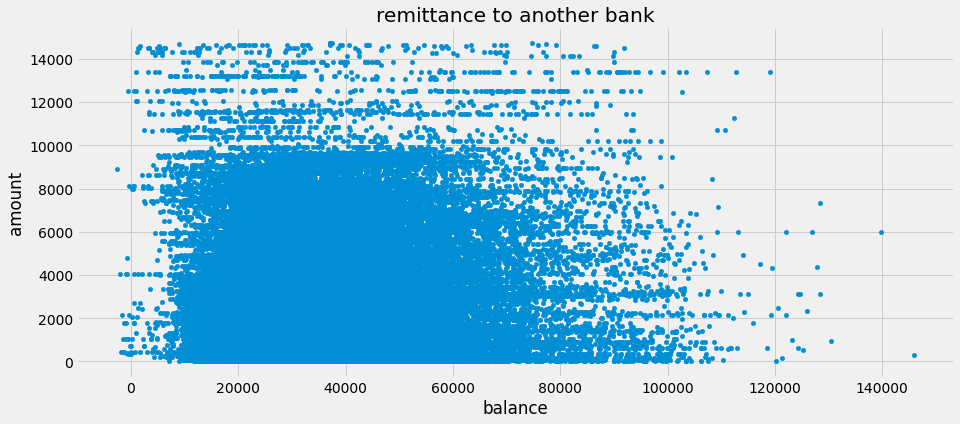

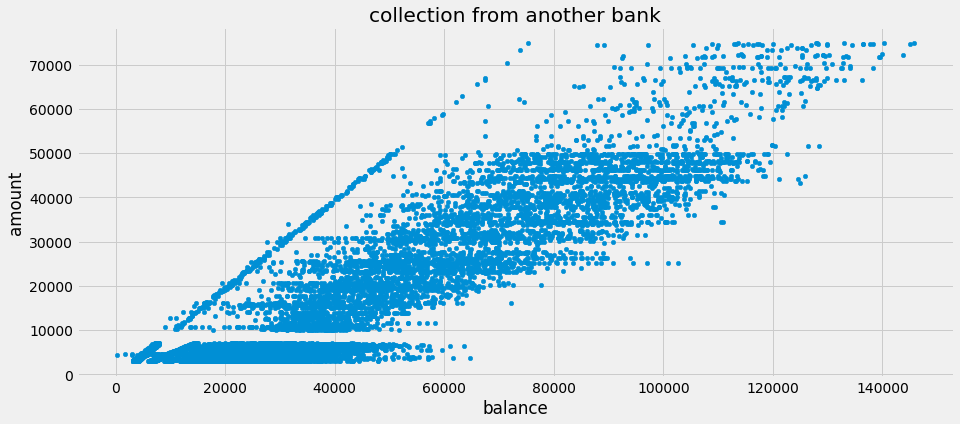

In [ ]:
dfTxTrainAcountRemittance = textToFloat(dfTxTrainAcount, ['amount', 'balance'])[dfTxTrainAcount.operation =='remittance to another bank']
dfTxTrainAcountCollection = textToFloat(dfTxTrainAcount, ['amount', 'balance'])[dfTxTrainAcount.operation =='collection from another bank']

ax5 = dfTxTrainAcountRemittance.plot.scatter(x='balance', y='amount', figsize=(14,6),  title="remittance to another bank")

ax6 = dfTxTrainAcountCollection.plot.scatter(x='balance', y='amount', figsize=(14,6), title="collection from another bank")

In the transations that are collections from other banks we can see that usually the balance is superior to the amount of the transactions.

We'll look into the cases were the amount is larger that the balance.

This means that, after the transaction, the card owner will have a negative balance. We think this information might be relevant to the loan approval/non-approval.

We'll check if account that make more transactions with balance below 0 dollars are more likely to having loans declined:

In [ ]:
dfTxTrainHigherAmount = textToFloat(dfTxTrainAcount, ['amount', 'balance'])
dfTxTrainHigherAmount = dfTxTrainHigherAmount[dfTxTrainAcount.amount > dfTxTrainAcount.balance]

dfTxTrainHigherAmount.groupby(['account_id'])['account_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,account_id,count
84,9883,19
64,5423,19
59,4171,14
32,2749,14
65,5442,13
...,...,...
52,3755,1
13,1695,1
57,3973,1
10,1475,1


In [ ]:
listNegBalance = dfTxTrainHigherAmount.account_id.unique()

for i in range(0, len(listNegBalance)):
    listNegBalance[i] = float(listNegBalance[i])

tempDf = dfLoanTrain[dfLoanTrain['account_id'].isin(listNegBalance)]

tempDf.groupby(['status'])['status'].count().reset_index(name='count').sort_values(['count'], ascending=False)

listNegBalance

array([10738.0, 5442.0, 9265.0, 7485.0, 3674.0, 9640.0, 8566.0, 9656.0,
       10451.0, 10942.0, 3629.0, 2227.0, 9583.0, 1967.0, 11054.0, 10411.0,
       1536.0, 212.0, 2651.0, 1475.0, 9703.0, 5483.0, 9635.0, 5423.0,
       485.0, 4035.0, 1896.0, 2037.0, 1695.0, 2378.0, 9883.0, 2749.0,
       2576.0, 3113.0, 4171.0, 3371.0, 3717.0, 365.0, 3876.0, 3693.0,
       3965.0, 1786.0, 6281.0, 5546.0, 1534.0, 2327.0, 950.0, 345.0,
       3279.0, 1965.0, 1701.0, 3555.0, 3624.0, 3930.0, 3345.0, 3595.0,
       3109.0, 6806.0, 1251.0, 26.0, 625.0, 11382.0, 635.0, 3770.0, 78.0,
       2991.0, 1838.0, 2551.0, 3233.0, 487.0, 3755.0, 2390.0, 2799.0,
       7487.0, 84.0, 2435.0, 131.0, 1932.0, 2811.0, 510.0, 1396.0, 4418.0,
       2763.0, 3973.0, 1333.0], dtype=object)

In [ ]:
dfTxTrainNeg = dfTxTrain[dfTxTrain.amount > 0]

listNegBalance2 = dfTxTrainNeg.account_id.unique()

for i in range(0, len(listNegBalance2)):
    listNegBalance2[i] = float(listNegBalance2[i])

tempDf2 = dfLoanTrain[dfLoanTrain['account_id'].isin(listNegBalance2)]

# listNegBalance
tempDf2.groupby(['status'])['status'].count().reset_index(name='count').sort_values(['count'], ascending=False)


,status,count


So around 18% of the people that ever get negative balance are refused a loan. This is not a significant amount considering 14.5% of the entries in the loan training data do are refused.

However, we'll create a new entry on the Accounts dataset flaging if the user ever reached negative balance.

In [ ]:
dfTxTrainFlagNeg = dfTxTrain[dfTxTrain['balance'] < 0]

dfTxTrainFlagNeg.groupby(['account_id'])
dfTxTrainFlagNeg.drop(dfTxTrainFlagNeg.columns.difference(['account_id','balance']), 1, inplace=True)
dfTxTrainFlagNeg['had_negative_balance'] = True

dfTxTrainFlagNeg.drop('balance', axis=1).set_index('account_id')

,had_negative_balance
account_id,
5442,True
11021,True
3166,True
3166,True
3166,True
...,...
3407,True
3407,True
6463,True


*Accounts that had negative value for the Training set*

In [ ]:
# Doing the same for test

dfTxTestAcount = dfTxTest[dfTxTest.account != 0]
dfTxTestHigherAmount = textToFloat(dfTxTestAcount, ['amount', 'balance'])
dfTxTestHigherAmount = dfTxTestHigherAmount[dfTxTestAcount.amount > dfTxTestAcount.balance]

dfTxTestHigherAmount.groupby(['account_id'])['account_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

listNegBalanceTest = dfTxTestHigherAmount.account_id.unique()

for i in range(0, len(listNegBalanceTest)):
    listNegBalanceTest[i] = float(listNegBalanceTest[i])

tempDfTest = dfLoanTest[dfLoanTest['account_id'].isin(listNegBalanceTest)]

tempDfTest.groupby(['status'])['status'].count().reset_index(name='count').sort_values(['count'], ascending=False)

dfTxTestNeg = dfTxTest[dfTxTest.amount > 0]

listNegBalance2Test = dfTxTestNeg.account_id.unique()

for i in range(0, len(listNegBalance2Test)):
    listNegBalance2Test[i] = float(listNegBalance2Test[i])

tempDf2Test = dfLoanTest[dfLoanTest['account_id'].isin(listNegBalance2Test)]

# listNegBalance
tempDf2Test.groupby(['status'])['status'].count().reset_index(name='count').sort_values(['count'], ascending=False)



dfTxTestFlagNeg = dfTxTest[dfTxTest['balance'] < 0]

dfTxTestFlagNeg.groupby(['account_id'])
dfTxTestFlagNeg.drop(dfTxTestFlagNeg.columns.difference(['account_id','balance']), 1, inplace=True)
dfTxTestFlagNeg['had_negative_balance'] = True

dfTxTestFlagNeg.drop('balance', axis=1).set_index('account_id')

,had_negative_balance
account_id,
37,True
1888,True
2051,True
2051,True
2051,True
...,...
9633,True
10365,True
10365,True


*Accounts that had negative value to the Test set*

### Data Analysis

#### Fetching ammount of Transfers per account_id

Transforming string into floats

In [ ]:
dfTxTrain = textToFloat(dfTxTrain, ['amount', 'balance'])
dfTxTest = textToFloat(dfTxTest, ['amount', 'balance'])

In [ ]:
nTxTrain = dfTxTrain.groupby(['account_id'])['account_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)
nTxTest = dfTxTest.groupby(['account_id'])['account_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

#### Getting date of first transfer

In [ ]:
dfTxAggregate = pd.DataFrame()

dfTxAggregate['account_id']  = dfTxTrain['account_id'].unique()
firstTxTrain = dfTxTrain.sort_values(['account_id', 'date'], ascending=[True, True]).groupby(['account_id']).agg({'date': getFirstEntry}).reset_index()



dfTxAggregateTest = pd.DataFrame()

dfTxAggregateTest['account_id']  = dfTxTest['account_id'].unique()
firstTxTest = dfTxTest.sort_values(['account_id', 'date'], ascending=[True, True]).groupby(['account_id']).agg({'date': getFirstEntry}).reset_index()


firstTxTrain

,account_id,date
0,1,1995-03-24
1,10,1996-08-28
2,100,1993-12-28
3,1000,1993-01-25
4,10001,1995-05-28
...,...,...
3365,992,1995-10-01
3366,9928,1995-11-09
3367,994,1995-09-15
3368,995,1995-08-23


### Merge Data


Since we are dropping the bank, type and account attributes, we'll only need the data from the k_symbol and operation

In [ ]:
dfTxProcessed = kSymbolProcessed.merge(operationProcessed, on='account_id')
dfTxProcessed = dfTxProcessed.reset_index()

dfTxProcessedTest = kSymbolProcessedTest.merge(operationProcessed, on='account_id')
dfTxProcessedTest = dfTxProcessedTest.reset_index()

In [ ]:
negativeEntries = dfTxTrainFlagNeg['account_id'].unique();
negativeEntriesTest = dfTxTestFlagNeg['account_id'].unique();

def helperFoo (row):
  if (row['account_id'] in negativeEntries):
    return True;
  else:
    return False;


dfTxProcessed['had_negative_balance'] = dfTxProcessed.apply(lambda row: helperFoo(row), axis=1)
print(dfTxProcessed.groupby(['had_negative_balance'])['had_negative_balance'].count())
dfTxProcessed = dfTxProcessed.merge(firstTxTrain.rename(columns={'date': 'date_first_tx'}), on="account_id")

dfTxProcessedTest['had_negative_balance'] = dfTxProcessedTest.apply(lambda row: helperFoo(row), axis=1)
dfTxProcessedTest = dfTxProcessedTest.merge(firstTxTest.rename(columns={'date': 'date_first_tx'}), on="account_id")

dfTxProcessed

had_negative_balance
False    3261
True      109
Name: had_negative_balance, dtype: int64


,account_id,household_mean,insurrance_payment_mean,interest_credited_mean,no_k_symbol_mean,payment_for_statement_mean,sanction_interest_mean,credit_cash_mean,collection_mean,withdrawal_cash_mean,remitance_mean,credit_card_withdrawal_mean,no_operation_mean,had_negative_balance,date_first_tx
0,1,2452.000000,1309.588816,74.814286,2466.932203,14.600000,5.818024,2600.000000,3679.000000,1015.706383,2452.000000,2254.313025,74.814286,False,1995-03-24
1,10,4181.313649,1309.588816,105.250000,13354.111111,17.076382,5.818024,13981.166667,10960.622849,12100.000000,3786.862297,2254.313025,105.250000,False,1996-08-28
2,100,598.000000,1309.588816,141.533333,6925.087591,14.600000,5.818024,9957.823529,10960.622849,2404.967442,3963.500000,2254.313025,141.533333,False,1993-12-28
3,1000,3179.000000,2852.000000,193.719149,14463.717172,14.600000,5.818024,200.000000,34015.914894,8013.805333,2502.000000,2254.313025,193.719149,False,1993-01-25
4,10001,4181.313649,1309.588816,161.307692,9642.595745,14.600000,5.818024,15668.875000,10960.622849,5065.785000,3786.862297,2254.313025,161.307692,False,1995-05-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,992,3231.000000,335.000000,109.066667,5461.070175,14.600000,5.818024,9225.500000,10960.622849,3392.330769,1771.750000,2254.313025,109.066667,False,1995-10-01
3366,9928,5016.000000,1309.588816,157.833333,7115.200000,14.600000,5.818024,11083.636364,10960.622849,2949.105263,5016.000000,2254.313025,157.833333,False,1995-11-09
3367,994,4181.313649,1309.588816,133.750000,5221.534483,14.600000,5.818024,4954.515152,10960.622849,3578.317949,3786.862297,2254.313025,133.750000,False,1995-09-15
3368,995,2153.000000,1309.588816,72.975000,1781.921053,14.600000,5.818024,1000.000000,3445.000000,463.418182,1148.000000,2254.313025,72.975000,False,1995-08-23


#### Adding generated data

# Joining tables

Join all the information about a account (and it's owner) in the same dataset

In [ ]:
dfDispOwner = dfDisp[dfDisp['owner'] == True]
dfDispOwner.drop(['disp_id', 'owner'], axis=1, inplace=True)

dfAccountMain = dfAccount.merge(dfTxProcessed, on="account_id")

dfClientInfo = dfClient.merge(dfDistrict.rename(columns={'code': 'district_id', 'name': 'district_name'}), on="district_id")

dfClientDistrictDisp = dfDispClient.merge(dfClientInfo,on='client_id', how='left')
dfClientDistrictDisp.drop(['district_name'], axis=1, inplace=True)

dfAccountMain = dfDispOwner.merge(dfAccountMain, on='account_id', how='left').merge(dfClientDistrictDisp, on='client_id')

dfAccountMain.drop(['date','frequency','district_id_y', 'district_id_x','age_y', 'date_first_tx'], axis=1, inplace=True)

dfAccountMain = substitueNaNByMean(dfAccountMain)

dfAccountMain["had_negative_balance"] = dfAccountMain["had_negative_balance"].astype(int)

#print(dfAccountMain.isnull().mean().unique())

# Clustering

In this section, we use the same dataframe we're going to use in the next one, for the prediction purposes. Here, we start by dropping some columns and creating a new one. The reason behind this is that we're going to apply the clustering to the clients and there is some information regarding the district that, although is somehow related with the client, doesn't characterize it directly (e.g. the unemployment rate of the region the client belongs to doesn't characterize directly the client). Also, since we're describing the clients itself, there's no need to have the account_id, since the most important is the client_id in this case.

***Previous Note:*** the clustering part was built by following the K-Mean Clustering Python guide (https://realpython.com/k-means-clustering-python/)

In [ ]:
dfCluster = dfAccountMain.drop(['num_commited_crimes_96', 'num_commited_crimes_95', 'ratio_entrepreneurs', 'unemployment_rate_96', 'unemployment_rate_95', 'ratio_urban_inhabitants', 'no. of cities', 'num_municipalities_>10000', 'no. of municipalities with inhabitants 2000-9999', 'num_municipalities_500-1999', 'num_municipalities_<499', 'inhabitants', 'region', 'avg_salary ', 'account_id', 'sex', 'n_disponent', 'n_owner'], axis=1)

Applying standardization to the dfCluster dataframe.

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dfCluster)

## K-Means

For the k-means, we'll started by using as the value of k the sqrt(N/2), as mentioned in the theoretical class, where N is 16 in our case (we've considered for N the number of attributes except the client_id). Then, we've used the tecnniques of the next two sections to select the appropriate number of clusters and we've ended with 3 being the initial and, at the same time, the best choice for k.

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=None
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [ ]:
clust_labels = kmeans.predict(scaled_features)

In [ ]:
# The lowest SSE value
kmeans.inertia_

49128.186599336725

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.12808477,  0.01205372,  0.09618804,  0.03230814,  0.02095398,
         0.05068069, -0.06438129,  0.01137963,  0.17322047,  0.05071944,
         0.00176252,  0.0920662 , -0.07452502,  0.02095398, -0.04621554],
       [-0.33291308, -0.16154496, -0.5892131 , -0.07646341, -0.91021791,
        -1.0230404 , -0.19508346,  0.00244027, -0.96703694, -0.59772781,
        -0.83894208, -0.59808384, -0.01907101, -0.91021791, -0.14834151],
       [ 0.21396898,  0.23196109,  0.71247865,  0.04175376,  1.42708507,
         1.53458745,  0.48200956, -0.03307424,  1.13007685,  0.84262041,
         1.36022282,  0.73745092,  0.22162883,  1.42708507,  0.35951235]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

14

In [ ]:
k_means = pd.DataFrame(clust_labels)
dfCluster.insert((dfCluster.shape[1]),'kmeans',k_means)

In [ ]:
dfCluster.head()

,client_id,age_x,household_mean,insurrance_payment_mean,interest_credited_mean,no_k_symbol_mean,payment_for_statement_mean,sanction_interest_mean,credit_cash_mean,collection_mean,withdrawal_cash_mean,remitance_mean,credit_card_withdrawal_mean,no_operation_mean,had_negative_balance,kmeans
0,1,9415.000000,2452.000000,1309.588816,74.814286,2466.932203,14.600000,5.818024,2600.000000,3679.000000,1015.706383,2452.000000,2254.313025,74.814286,0,1
1,2,10171.000000,7266.000000,1309.588816,128.930000,11873.424242,14.600000,5.818024,2400.000000,22259.600000,6093.133333,7266.000000,2254.313025,128.930000,0,0
2,4,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.602610,3786.862297,2254.313025,134.139918,0,0
3,6,9081.000000,2078.000000,1309.588816,98.416667,1858.333333,14.600000,5.818024,800.000000,5553.000000,1261.600000,1645.454545,2254.313025,98.416667,0,1
4,7,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.602610,3786.862297,2254.313025,134.139918,0,0


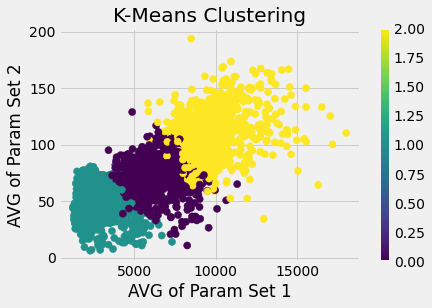

In [ ]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)

dfCluster['avg1'] = dfCluster[['household_mean','insurrance_payment_mean','no_k_symbol_mean','credit_cash_mean','collection_mean','withdrawal_cash_mean','remitance_mean','credit_card_withdrawal_mean']].mean(axis=1)
dfCluster['avg2'] = dfCluster[['interest_credited_mean','payment_for_statement_mean','sanction_interest_mean','no_operation_mean']].mean(axis=1)

scatter = ax.scatter(dfCluster['avg1'],dfCluster['avg2'],c=k_means[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('AVG of Param Set 1')
ax.set_ylabel('AVG of Param Set 2')
plt.colorbar(scatter)


### Choosing the appropriate number of clusters

#### Elbow Method

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": None,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

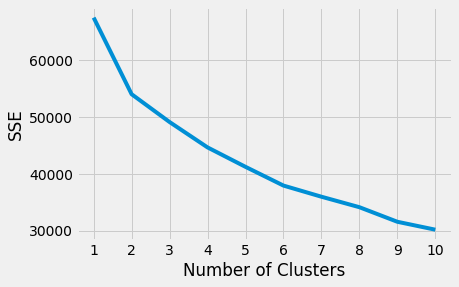

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

#### Silhouette Coefficient

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

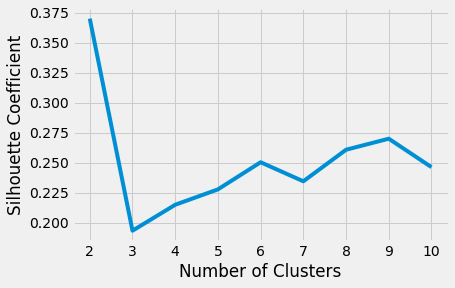

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Advanced Clustering Performance Measure Technique


In [ ]:
# Instantiate dbscan algorithms
dbscan = DBSCAN(eps=0.3)

# Fit the algorithm to the features
dbscan.fit(scaled_features)

# Compute the silhouette score
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [ ]:
dbscan_silhouette

-0.2

## Conclusions

In [ ]:
group_A = dfCluster[dfCluster['kmeans'] == 0]
group_B = dfCluster[dfCluster['kmeans'] == 1]
group_C = dfCluster[dfCluster['kmeans'] == 2]

In [ ]:
group_A.describe()

,age_x,household_mean,insurrance_payment_mean,interest_credited_mean,no_k_symbol_mean,payment_for_statement_mean,sanction_interest_mean,credit_cash_mean,collection_mean,withdrawal_cash_mean,remitance_mean,credit_card_withdrawal_mean,no_operation_mean,had_negative_balance,kmeans,avg1,avg2
count,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.0,2221.000000,2221.000000
mean,9487.881767,4370.224557,1324.550265,135.169977,9131.865041,16.456197,5.828084,11122.711331,11301.517067,5436.143738,3951.849992,2245.154169,135.169977,0.017109,0.0,6110.502020,73.156058
std,323.908742,1409.429794,549.175534,21.374980,2460.855037,4.438613,0.764557,4258.464640,2072.218288,2064.053588,1227.999342,101.060572,21.374980,0.129708,0.0,962.237744,10.613445
min,8771.000000,2.000000,2.000000,10.200000,600.000000,14.600000,0.200000,150.000000,10953.815789,800.000000,26.000000,500.000000,10.200000,0.000000,0.0,3417.765786,10.823602
25%,9474.000000,4181.313649,1309.588816,134.139918,8828.741556,14.600000,5.818024,9783.505916,10960.622849,4993.924324,3786.862297,2254.313025,134.139918,0.000000,0.0,5816.943840,72.793561
50%,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.602610,3786.862297,2254.313025,134.139918,0.000000,0.0,5816.943840,72.793561
75%,9483.060534,4181.313649,1309.588816,134.139918,9055.500000,17.076382,5.818024,12737.580645,10960.622849,5430.602610,3786.862297,2254.313025,134.139918,0.000000,0.0,6327.756329,72.793561
max,10227.000000,15925.000000,12504.000000,246.500000,24550.500000,100.000000,31.633333,25697.840909,48201.000000,22000.000000,13208.000000,3166.666667,246.500000,1.000000,0.0,11326.772550,128.973602


In [ ]:
group_B.describe()

,age_x,household_mean,insurrance_payment_mean,interest_credited_mean,no_k_symbol_mean,payment_for_statement_mean,sanction_interest_mean,credit_cash_mean,collection_mean,withdrawal_cash_mean,remitance_mean,credit_card_withdrawal_mean,no_operation_mean,had_negative_balance,kmeans,avg1,avg2
count,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.0,1411.000000,1411.000000
mean,9416.690999,3022.772017,1274.138619,89.343436,2651.912578,15.194963,5.820184,2286.877512,6938.531421,2045.694068,2713.820479,2251.966549,89.343436,0.001417,1.0,2898.214156,49.925505
std,490.739806,1204.651840,238.872671,30.641692,1644.091868,1.058380,0.128106,2527.573478,3249.798427,1716.029969,1032.836337,45.662222,30.641692,0.037635,0.0,1025.490899,15.329549
min,8768.000000,1.000000,1.000000,2.200000,200.000000,14.600000,4.300000,200.000000,2900.000000,14.600000,293.000000,940.000000,2.200000,0.000000,1.0,1229.466320,6.204506
25%,8954.500000,2127.500000,1309.588816,70.200000,1763.916667,14.600000,5.818024,600.000000,4112.000000,871.671906,1945.500000,2254.313025,70.200000,0.000000,1.0,2070.263165,40.408673
50%,9313.000000,3198.000000,1309.588816,89.620000,2224.714286,14.600000,5.818024,900.000000,6003.000000,1409.036585,2844.000000,2254.313025,89.620000,0.000000,1.0,2587.307016,49.914506
75%,9930.000000,4181.313649,1309.588816,110.590000,3244.637181,14.600000,5.818024,3815.154762,10960.622849,2418.763855,3786.862297,2254.313025,110.590000,0.000000,1.0,3680.452721,60.399506
max,10227.000000,5427.000000,3160.000000,156.709756,15318.000000,17.076382,10.383333,15318.000000,25635.000000,7266.666667,4954.000000,2254.313025,156.709756,1.000000,1.0,7319.912906,83.459384


In [ ]:
group_C.describe()

,age_x,household_mean,insurrance_payment_mean,interest_credited_mean,no_k_symbol_mean,payment_for_statement_mean,sanction_interest_mean,credit_cash_mean,collection_mean,withdrawal_cash_mean,remitance_mean,credit_card_withdrawal_mean,no_operation_mean,had_negative_balance,kmeans,avg1,avg2
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.0,868.000000,868.000000
mean,9578.612903,5581.234289,1328.933112,204.324338,18094.027760,21.721673,5.788774,18543.145835,16626.573247,10918.850432,5109.010146,2281.562678,204.324338,0.079493,2.0,9810.417187,109.039781
std,451.739123,2890.270891,496.005444,40.704493,4585.666113,20.036218,1.592147,9063.820038,12154.965582,4471.765824,2719.131648,218.981601,40.704493,0.270663,0.0,1698.452904,21.046923
min,8789.000000,99.000000,4.000000,57.200000,8068.275862,14.600000,0.100000,200.000000,10960.622849,3726.633613,488.000000,900.000000,57.200000,0.000000,2.0,5850.598253,34.323602
25%,9116.500000,4181.313649,1309.588816,176.285625,14942.309416,14.600000,5.818024,17584.764181,10960.622849,7834.047186,3786.862297,2254.313025,176.285625,0.000000,2.0,8661.018787,94.657539
50%,9616.500000,4181.313649,1309.588816,203.374061,17419.364011,14.600000,5.818024,21904.050000,10960.622849,10084.296284,3786.862297,2254.313025,203.374061,0.000000,2.0,9470.513784,108.069089
75%,10008.250000,7100.000000,1309.588816,228.636215,20559.923333,17.076382,5.818024,24544.574002,10960.622849,12813.172738,6263.750000,2254.313025,228.636215,0.000000,2.0,10599.631837,122.327004
max,10227.000000,15318.421053,7082.000000,334.923077,40183.700000,100.000000,28.957143,33834.000000,59853.500000,44800.000000,14723.000000,3900.000000,334.923077,1.000000,2.0,18023.128473,193.916044


By analysing the three groups obtained after the clustering, we’ve characterized them as follows:

- Group C - The smallest in number of clients (868), but, simultaneously, the one with higher average for ‘household’ transactions, with higher credit in the bank and in transactions for other banks, as well as with the highest withdrawal values, in average.
- Group B - The second most numerous group (1411), that characterizes by being the one with the lowest averages for all the values that were analysed and compared.
- Group A - The largest group (more clients: 2221), with values (average, minimum and maximum) for each of the fields more or less equal to the average of the overall dataset.

Semantically speaking:

- Group C - Less clients, but with higher financial capacity (society high class)

- Group A - Numerous clients, with an average financial capacity (society average class)

- Group B - Remaining clients, with a financial capacity below the average (society low class)

# Prediction

Join AccountMain with Transfer Dataset already done.

In [ ]:
dfTrain = dfAccountMain

In [ ]:
dfTest = dfAccountMain

Joining with Loan Dataset

In [ ]:
dfTrain = dfLoanTrain.drop(['loan_id', 'date'], axis=1).merge(dfTrain, on='account_id', how="left")
pd.set_option('max_columns', None)

In [ ]:
dfTest = dfLoanTest.drop(['loan_id', 'date'], axis=1).merge(dfTest, on='account_id', how="left")
pd.set_option('max_columns', None)


In [ ]:
print(dfTrain.isna().mean().unique())
dfTrain

[0.]


,account_id,amount,duration,payments,status,client_id,age_x,household_mean,insurrance_payment_mean,interest_credited_mean,no_k_symbol_mean,payment_for_statement_mean,sanction_interest_mean,credit_cash_mean,collection_mean,withdrawal_cash_mean,remitance_mean,credit_card_withdrawal_mean,no_operation_mean,had_negative_balance,n_disponent,n_owner,sex,region,inhabitants,num_municipalities_<499,num_municipalities_500-1999,no. of municipalities with inhabitants 2000-9999,num_municipalities_>10000,no. of cities,ratio_urban_inhabitants,avg_salary,unemployment_rate_95,unemployment_rate_96,ratio_entrepreneurs,num_commited_crimes_95,num_commited_crimes_96
0,1787,96396,12,8033,-1,2166,10147.0,4181.313649,1309.588816,134.139918,5025.000000,17.076382,5.818024,5025.000000,10960.622849,5430.602610,3786.862297,2254.313025,134.139918,0,0,1,0,7,94812,15,13,8,2,10,0.82,9650,3.38,3.67,0.100,2985,2804
1,1801,165960,36,4610,1,2181,10184.0,4167.000000,956.000000,168.540000,16478.750000,14.600000,5.818024,19087.583333,10960.622849,13018.816667,2682.375000,2254.313025,168.540000,0,0,1,1,2,112709,48,20,7,3,10,0.74,8369,1.79,2.31,0.117,2854,2618
2,9188,127080,60,2118,1,11314,10189.0,7936.000000,66.000000,92.625000,8662.571429,17.076382,5.818024,2250.000000,13981.000000,7733.333333,2824.333333,2254.313025,92.625000,0,0,1,1,2,77917,85,19,6,1,5,0.54,8390,2.28,2.89,0.132,2080,2122
3,1843,105804,36,2939,1,2235,10198.0,6994.000000,1309.588816,160.360000,11969.250000,14.600000,5.818024,2450.000000,19101.333333,7202.920000,6994.000000,2254.313025,160.360000,0,0,1,0,5,177686,69,27,10,1,9,0.75,10045,1.42,1.71,0.135,6604,6295
4,11013,274740,60,4579,1,13539,10183.0,756.000000,1309.588816,190.183333,28310.222222,30.000000,5.818024,600.000000,45764.333333,19587.272727,6584.666667,2254.313025,190.183333,0,0,1,1,6,86513,38,36,5,1,5,0.50,8288,3.79,4.52,0.110,1562,1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,9030,155616,48,3242,1,11121,9477.0,2587.000000,1309.588816,145.472727,8574.760870,14.600000,5.818024,17115.384615,10960.622849,4987.618182,1709.000000,2254.313025,145.472727,0,1,1,0,4,226122,32,50,7,4,4,0.63,8994,3.80,4.79,0.110,9672,9208
324,3189,222180,60,3703,-1,3855,9165.0,4181.313649,1309.588816,223.050000,16805.853659,14.600000,5.818024,23313.437500,10960.622849,10197.180645,3786.862297,2254.313025,223.050000,0,0,1,1,7,45714,52,10,5,1,6,0.56,8843,2.82,3.60,0.113,818,888
325,8972,45024,48,938,1,11050,8991.0,4719.000000,1309.588816,114.216667,13084.363636,14.600000,5.818024,21191.000000,10960.622849,8629.938462,3387.500000,2254.313025,114.216667,0,0,1,0,4,285387,0,2,8,5,7,0.90,10177,6.63,7.75,0.081,9878,10108
326,10963,115812,36,3217,1,13480,9358.0,4181.313649,1309.588816,206.068421,18665.534091,14.600000,5.818024,26262.156250,10960.622849,10992.139726,3786.862297,2254.313025,206.068421,0,0,1,1,5,93931,74,21,10,1,8,0.57,8427,1.12,1.54,0.107,1874,1913


In [ ]:
#print(dfTest.isna().mean().unique())
dfTest

,account_id,amount,duration,payments,status,client_id,age_x,household_mean,insurrance_payment_mean,interest_credited_mean,no_k_symbol_mean,payment_for_statement_mean,sanction_interest_mean,credit_cash_mean,collection_mean,withdrawal_cash_mean,remitance_mean,credit_card_withdrawal_mean,no_operation_mean,had_negative_balance,n_disponent,n_owner,sex,region,inhabitants,num_municipalities_<499,num_municipalities_500-1999,no. of municipalities with inhabitants 2000-9999,num_municipalities_>10000,no. of cities,ratio_urban_inhabitants,avg_salary,unemployment_rate_95,unemployment_rate_96,ratio_entrepreneurs,num_commited_crimes_95,num_commited_crimes_96
0,4473,93960,60,1566,,5395,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,0,1,1,2,77917,85,19,6,1,5,0.54,8390,2.28,2.89,0.132,2080,2122
1,10365,260640,36,7240,,12756,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,0,1,0,7,58400,65,16,4,1,6,0.52,8620,1.10,1.25,0.100,1089,1117
2,5724,232560,48,4845,,6922,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,0,1,0,5,177686,69,27,10,1,9,0.75,10045,1.42,1.71,0.135,6604,6295
3,5591,221880,60,3698,,6749,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,1,1,0,1,81344,61,23,4,2,6,0.55,8899,3.39,3.97,0.149,2987,2487
4,2018,38520,12,3210,,2451,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,0,1,1,2,95907,87,25,5,2,7,0.59,8388,2.41,2.94,0.087,1658,1668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,105,352704,48,7348,,127,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,0,1,0,5,103347,87,16,7,1,7,0.67,9104,1.51,2.07,0.123,2299,2354
350,1284,52512,12,4376,,1554,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,0,1,1,6,157042,49,70,18,0,9,0.34,8743,1.88,2.43,0.111,3659,3894
351,6922,139488,24,5812,,8356,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,0,1,1,1,75232,55,26,4,1,5,0.42,8980,1.95,2.21,0.111,2824,2813
352,1928,55632,24,2318,,2342,9483.060534,4181.313649,1309.588816,134.139918,8828.741556,17.076382,5.818024,9783.505916,10960.622849,5430.60261,3786.862297,2254.313025,134.139918,0,0,1,1,4,285387,0,2,8,5,7,0.90,10177,6.63,7.75,0.081,9878,10108


In [ ]:
#average amount per payment
dfTest['amountPerPayment'] = dfTest['amount']/dfTest['payments']
dfTrain['amountPerPayment'] = dfTrain['amount']/dfTrain['payments']

# string -> float
dfTest['avg_salary'] = dfTest['avg_salary '].astype('float')
dfTrain['avg_salary'] = dfTrain['avg_salary '].astype('float')

In [ ]:
dfTest.drop(['avg_salary '], axis=1, inplace=True)
dfTrain.drop(['avg_salary '],axis=1, inplace=True)

we end up dropping the avg_salary column

## Logistic Regression

In [ ]:
y_train = dfTrain['status']
x_train = dfTrain.drop(['status'], axis=1)
y_test = dfTest['status']
x_test = dfTest.drop(['status'], axis=1)

In [ ]:
lr_model = sklearn.linear_model.LogisticRegression()
lr_model = lr_model.fit(x_train, y_train)
lr_model.score(x_train, y_train)

0.8689024390243902

In [ ]:
# Prediction without probabilities
predicted = lr_model.predict(x_test)
dfTest['status'] = predicted
print(dfTest['status'].value_counts())

#fpr, tpr, thresholds = sklearn.metrics.roc_curve(list(prev_status.astype(int)), predicted.astype(int), pos_label=1)
#print(sklearn.metrics.auc(fpr, tpr))

# Prediction with probabilities

probs = pd.DataFrame(lr_model.predict_proba(x_test))
dfTest['Predicted'] = probs[1]

submission_table = dfTest[['account_id', 'Predicted']]

submission_table = dfLoanTest.merge(submission_table, on='account_id', how="left")
submission_table = submission_table[['loan_id', 'Predicted']]

submission_table.rename({'loan_id': 'Id'}, axis=1, inplace=True)

decimals = 1
submission_table['Predicted'] = submission_table['Predicted'].apply(lambda x: round(x, decimals))

submission_table.head()

1     339
-1     15
Name: status, dtype: int64


,Id,Predicted
0,5895,0.9
1,7122,0.7
2,6173,0.8
3,6142,0.8
4,5358,0.8


In [ ]:
submission_table.to_csv('linear_model.csv', index=False)
#files.download('linear_model.csv')

##Random Forest + Smote

To know wich parameters fit best the Random Forest model, we've used the parameter hypertuning technique to get the best ones.

In [ ]:
y_train = dfTrain['status']
x_train = dfTrain.drop(['status','inhabitants','region','num_municipalities_<499','num_municipalities_500-1999','no. of municipalities with inhabitants 2000-9999','num_municipalities_>10000','no. of cities'], axis=1)
x_test = dfTest.drop(['status','n_owner','inhabitants','region','num_municipalities_<499','num_municipalities_500-1999','no. of municipalities with inhabitants 2000-9999','num_municipalities_>10000','no. of cities'], axis=1)

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [90, 100],
    'max_features': ['auto', 2],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [10, 12],
    'n_estimators': [200, 300],
    'random_state': [40, 42],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}

classifier = RandomForestClassifier()

"""
p = Pipeline([('classification', classifier)])
p = Pipeline([('sampling', SMOTE),('classification', classifier)])
classifier = p
"""
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)


"""
y_pred = classifier.predict_proba(x_test)

dfTest['Status'] = classifier.predict(x_test)
print(dfTest['Status'].value_counts())

list_aux = []
for i in range(0, len(y_pred)):
  list_aux.append(y_pred[i][0])
dfTest['Predicted'] = list_aux

submission_table = dfTest[['account_id', 'Predicted']]
submission_table = dfLoanTest.merge(submission_table, on='account_id', how="left")
submission_table = submission_table[['loan_id', 'Predicted']]
submission_table.rename({'loan_id': 'Id'}, axis=1, inplace=True)
decimals = 1
submission_table['Predicted'] = submission_table['Predicted'].apply(lambda x: round(x, decimals))

#submission_table.to_csv('linear_model.csv', index=False)
#files.download('linear_model.csv')
"""

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


'\ny_pred = classifier.predict_proba(x_test)\n\ndfTest[\'Status\'] = classifier.predict(x_test)\nprint(dfTest[\'Status\'].value_counts())\n\nlist_aux = []\nfor i in range(0, len(y_pred)):\n  list_aux.append(y_pred[i][0])\ndfTest[\'Predicted\'] = list_aux \n\nsubmission_table = dfTest[[\'account_id\', \'Predicted\']]\nsubmission_table = dfLoanTest.merge(submission_table, on=\'account_id\', how="left")\nsubmission_table = submission_table[[\'loan_id\', \'Predicted\']]\nsubmission_table.rename({\'loan_id\': \'Id\'}, axis=1, inplace=True)\ndecimals = 1    \nsubmission_table[\'Predicted\'] = submission_table[\'Predicted\'].apply(lambda x: round(x, decimals))\n\n#submission_table.to_csv(\'linear_model.csv\', index=False)\n#files.download(\'linear_model.csv\')\n'

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 200,
 'random_state': 40}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=90, max_features=2, min_samples_leaf=4,
                       min_samples_split=12, n_estimators=200, random_state=40)

Having the best parameters for this model, we've then used them.

In [ ]:
y_train = dfTrain.iloc[:len(dfTrain)//2,]['status']
x_train = dfTrain.iloc[:len(dfTrain)//2,].drop(['status'], axis=1)
y_test = dfTrain.iloc[len(dfTrain)//2:,]['status']
x_test = dfTrain.iloc[len(dfTrain)//2:,].drop(['status'], axis=1)

classifier = RandomForestClassifier(bootstrap = True,
                                    max_depth = 90,
                                    max_features = 2,
                                    min_samples_leaf = 4,
                                    min_samples_split = 12,
                                    n_estimators = 200,
                                    random_state = 40,
                                    criterion = 'entropy',
                                    class_weight = 'balanced')

p = Pipeline([('classification', classifier)])
p = Pipeline([('sampling', SMOTE(random_state = 40)),('classification', classifier)])
classifier = p

classifier = classifier.fit(x_train,y_train)
predicted = classifier.predict(x_test)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(list(y_test.astype(int)), predicted.astype(int), pos_label=1)
print(sklearn.metrics.auc(fpr, tpr))

#prediction = classifier.predict_proba(x_test)

#dfTest['Status'] = classifier.predict(x_test)
#print(dfTest['Status'].value_counts())

#list_aux = []
#for i in range(0, len(y_pred)):
#  list_aux.append(y_pred[i][0])
#dfTest['Predicted'] = list_aux

"""
Kaggle Submission Preparation
"""
#submission_table = dfTest[['account_id', 'Predicted']]
#submission_table = dfLoanTest.merge(submission_table, on='account_id', how="left")
#submission_table = submission_table[['loan_id', 'Predicted']]
#submission_table.rename({'loan_id': 'Id'}, axis=1, inplace=True)
#decimals = 1
#submission_table['Predicted'] = submission_table['Predicted'].apply(lambda x: round(x, decimals))
#submission_table.to_csv('linear_model.csv', index=False)
#files.download('linear_model.csv')

0.6324200913242009


'\nKaggle Submission Preparation\n'

## Decision Tree

In [ ]:
#y_train = dfTrain['status']
#x_train = dfTrain.drop(['status'], axis=1)
#x_test = dfTest.drop(['status'], axis=1)

y_train = dfTrain.iloc[:len(dfTrain)//2,]['status']
x_train = dfTrain.iloc[:len(dfTrain)//2,].drop(['status'], axis=1)
y_test = dfTrain.iloc[len(dfTrain)//2:,]['status']
x_test = dfTrain.iloc[len(dfTrain)//2:,].drop(['status'], axis=1)

dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)
predicted = dtc.predict(x_test)

#predicted2 = dtc.predict_proba(x_test)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(list(y_test.astype(int)), predicted.astype(int), pos_label=1)
print(sklearn.metrics.auc(fpr, tpr))

0.5403348554033485


## K-Nearest Neighbor

In [ ]:
#y_train = dfTrain['status']
#x_train = dfTrain.drop(['status'], axis=1)
#x_test = dfTest.drop(['status'], axis=1)

y_train = dfTrain.iloc[:len(dfTrain)//2,]['status']
x_train = dfTrain.iloc[:len(dfTrain)//2,].drop(['status'], axis=1)
y_test = dfTrain.iloc[len(dfTrain)//2:,]['status']
x_test = dfTrain.iloc[len(dfTrain)//2:,].drop(['status'], axis=1)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)

#predicted2 = knn.predict_proba(x_test)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(list(y_test.astype(int)), predicted.astype(int), pos_label=1)
print(sklearn.metrics.auc(fpr, tpr))

0.4554794520547945


## Multi-layer Perceptron

In [ ]:
#y_train = dfTrain['status']
#x_train = dfTrain.drop(['status'], axis=1)
#x_test = dfTest.drop(['status'], axis=1)

y_train = dfTrain.iloc[:len(dfTrain)//2,]['status']
x_train = dfTrain.iloc[:len(dfTrain)//2,].drop(['status'], axis=1)
y_test = dfTrain.iloc[len(dfTrain)//2:,]['status']
x_test = dfTrain.iloc[len(dfTrain)//2:,].drop(['status'], axis=1)

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp.fit(x_train, y_train)
predicted = mlp.predict(x_test)

#predicted2 = mlp.predict_proba(x_test)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(list(y_test.astype(int)), predicted.astype(int), pos_label=1)
print(sklearn.metrics.auc(fpr, tpr))

0.4870624048706241


##Unsuccessful approaches

In [ ]:
# dfTest['effortPerPayment'] = dfTest['amountPerPayment']/dfTest['avg_salary']
# dfTrain['effortPerPayment'] = dfTrain['amountPerPayment']/dfTrain['avg_salary']

In [ ]:
"""
def normalize_columns(df, columns):

    for col in columns:
      if col!='status' and df[col].astype(float).min()!=df[col].astype(float).max() and not ('_id' in col):
        try:
          df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())
          # df[col] = df[col].apply(lambda x: x ** 2)
        except Exception as e:
          print(col)
          #df[col] = (df[col].astype(float) - df[col].astype(float).min())/(df[col].astype(float).max() - df[col].astype(float).min())
   """

"\ndef normalize_columns(df, columns):\n\n    for col in columns:\n      if col!='status' and df[col].astype(float).min()!=df[col].astype(float).max() and not ('_id' in col):\n        try:\n          df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())\n          # df[col] = df[col].apply(lambda x: x ** 2)\n        except Exception as e:\n          print(col)\n          #df[col] = (df[col].astype(float) - df[col].astype(float).min())/(df[col].astype(float).max() - df[col].astype(float).min())\n   "

In [ ]:
"""
def normalize(df, columns):
    for col in columns:
      if col!='status' and df[col].astype(float).min()!=df[col].astype(float).max() and not ('_id' in col):
        try:
          df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())
          # df[col] = df[col].apply(lambda x: x ** 2)
        except Exception as e:
          print(col)
          #df[col] = (df[col].astype(float) - df[col].astype(float).min())/(df[col].astype(float).max() - df[col].astype(float).min())
          """

"\ndef normalize(df, columns):\n    for col in columns:\n      if col!='status' and df[col].astype(float).min()!=df[col].astype(float).max() and not ('_id' in col):\n        try:\n          df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())\n          # df[col] = df[col].apply(lambda x: x ** 2)\n        except Exception as e:\n          print(col)\n          #df[col] = (df[col].astype(float) - df[col].astype(float).min())/(df[col].astype(float).max() - df[col].astype(float).min())\n          "

In [ ]:

"""
dfTest.drop(columns=['num_municipalities_<499'], inplace=True)
dfTrain.drop(columns=['num_municipalities_<499'], inplace=True)
dfTest.drop(columns=['num_municipalities_500-1999'], inplace=True)
dfTrain.drop(columns=['num_municipalities_500-1999'], inplace=True)
dfTrain.drop(columns=['no. of municipalities with inhabitants 2000-9999'], inplace=True)
dfTest.drop(columns=['no. of municipalities with inhabitants 2000-9999'], inplace=True)

dfTrain.drop(columns=['unemployment_rate_95','unemployment_rate_96'], inplace=True)
dfTest.drop(columns=['unemployment_rate_95','unemployment_rate_96'], inplace=True)

normalize_columns(dfTrain, dfTrain.columns)
normalize_columns(dfTest, dfTest.columns)
"""

"\ndfTest.drop(columns=['num_municipalities_<499'], inplace=True)\ndfTrain.drop(columns=['num_municipalities_<499'], inplace=True)\ndfTest.drop(columns=['num_municipalities_500-1999'], inplace=True)\ndfTrain.drop(columns=['num_municipalities_500-1999'], inplace=True)\ndfTrain.drop(columns=['no. of municipalities with inhabitants 2000-9999'], inplace=True)\ndfTest.drop(columns=['no. of municipalities with inhabitants 2000-9999'], inplace=True)\n\ndfTrain.drop(columns=['unemployment_rate_95','unemployment_rate_96'], inplace=True)\ndfTest.drop(columns=['unemployment_rate_95','unemployment_rate_96'], inplace=True)\n\nnormalize_columns(dfTrain, dfTrain.columns)\nnormalize_columns(dfTest, dfTest.columns)\n"